## Entendimiento y preparación de datos C1 y C8
### Notebook 1

#### Tesis Análisis, predicción y visualización de datos
Benjamin Reyes - Pablo Pastrana

In [153]:
# Carga de librerías a utilizar

# Librería para comandos del sistema
import os

# Librerías para manejo de datos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import joblib

# Librerías de aprendizaje automático.

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

## 1. Entendimiento de los datos

### 1.1 Carga de datos

In [154]:
# Se cargan los datasets

data_c1 = pd.read_csv('./data/ENUT_C1.csv', sep=',', encoding = 'utf-8')
data_c3 = pd.read_csv('./data/ENUT_C3.csv', sep=',', encoding = 'utf-8')
data_c8 = pd.read_csv('./data/ENUT_C8.csv', sep=',', encoding = 'utf-8')


### 1.2 Visualización de los datos

In [155]:
# Cantidad de datos y número de variables C1
data_c1.shape

(49051, 15)

In [156]:
# Cantidad de datos y número de variables C3
data_c3.shape

(147579, 40)

In [157]:
# Cantidad de datos y número de variables C8
data_c8.shape

(126753, 399)

In [158]:
# Se visualiza las primeras 5 columnas de ENUT C1
data_c1.head()


,DIRECTORIO,P424,P4030S1,P4030S1A1,P4030S5,P4030S3,P4030S4,P4030S4A1,P4030S6,P4030S2,MES_REF,DIA_REF,CLASE,REGION,F_EXP_VIV
0,3,2,1,4.0,1,1,1,3.0,1,1,9,5,1,2,239.883220
1,7,1,1,2.0,1,1,1,3.0,1,1,9,6,2,2,274.641682
2,11,2,1,2.0,1,1,1,2.0,1,1,9,4,2,2,478.663999
3,14,1,1,1.0,1,1,2,NaN,2,1,9,6,1,1,124.680583
4,17,1,1,2.0,1,1,1,3.0,1,1,9,6,1,1,184.098370


In [159]:
# Se visualiza las primeras 5 columnas de ENUT C3
data_c3.head()


,DIRECTORIO,SECUENCIA_P,ORDEN,P6040,P6020,P425,P1174,P1174S,P1174S1A,P1174S2A,...,P1181S,P1181S1A,P1181S2A,P1181S3A,P1182,P1182S,P1182S1A,P1182S2A,P1182S3A,F_EXP
0,3,1,1,76,1,1,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1,2,69,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1,1,56,2,1,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,22,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,31,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [160]:
# Se visualiza las primeras 5 columnas de ENUT C8
data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [161]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C1
data_c1['DIRECTORIO'].nunique()

49051

In [162]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C1
data_c3['DIRECTORIO'].nunique()

49051

In [163]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C8
data_c8['DIRECTORIO'].nunique()

49051

Observamos que todos los datasets tienen la misma cantidad de valores únicos en la columna DIRECTORIO, lo que rectifica que este es el número de ID único y, por lo tanto, será la variable con la que podemos juntar las tablas.

## 2. Entendimiento de las variables a utilizar

### 2.1 Ajustar nombres de columnas y variables

Lo primero que hacemos es sustituir los valores de referencia asignados a las columnas y las variables por nombres más comprensibles. 

In [164]:
# Cambio de nombre de las columnas para C1

data_c1.columns = pd.read_csv('./data/Nombres_columnas_C1.csv', sep=';', encoding = 'utf-8').columns
data_c1.head()

,id,tipoVivienda,energiaElectrica,estratoTarifa,acueducto,alcantarillado,recoleccionBasuras,diasSemana,Internet,gasNatural,mes,dia,urbanoORural,region,factorExpansion
0,3,2,1,4.0,1,1,1,3.0,1,1,9,5,1,2,239.883220
1,7,1,1,2.0,1,1,1,3.0,1,1,9,6,2,2,274.641682
2,11,2,1,2.0,1,1,1,2.0,1,1,9,4,2,2,478.663999
3,14,1,1,1.0,1,1,2,NaN,2,1,9,6,1,1,124.680583
4,17,1,1,2.0,1,1,1,3.0,1,1,9,6,1,1,184.098370


In [165]:
# Cambio de nombre de las columnas para C3

data_c3.columns = pd.read_csv('./data/Nombres_columnas_C3.csv', sep=';', encoding = 'utf-8').columns
data_c3.head()

,id,secuenciaP,orden,edad,sexo,parentescoJefatura,comparteJefatura,cuantas,numOrden,numOrden.1,...,cuantasPersonas.1,numOrden.10,numOrden.11,numOrden.12,decisionesVenta,cuantasPersonas.2,numOrden.13,numOrden.14,numOrden.15,factorExpansion
0,3,1,1,76,1,1,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1,2,69,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1,1,56,2,1,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,22,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,31,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [166]:
# Cambio de nombre de las columnas para C8 - temporalmente desabilitado

# data_c8.columns = pd.read_csv('./data/Nombres_columnas_C8.csv', sep=';', encoding = 'utf-8').columns
data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [167]:
# Función para sustituir los nombres de referencia por los nombres de las variables

variables_c1 = pd.read_csv('./data/Nombres_Variables_C1.csv', sep=',', encoding = 'utf-8')
variables_c3 = pd.read_csv('./data/Nombres_Variables_C3.csv', sep=',', encoding = 'utf-8')
variables_c8 = pd.read_csv('./data/Nombres_Variables_C8.csv', sep=',', encoding = 'utf-8')

def update_df_with_labels(df, mapping_df):
    # Itera sobre el mapa buscando "_valor"
    for col in mapping_df.columns:
        if '_valor' in col:
            # saca el nombre de la columna sin '_valor'
            original_col = col.replace('_valor', '')
            # revisa si la columna existe en el df original
            if original_col in df.columns:
                # Crea un mapa con el codigo numerico
                # Abandona valores NA
                mapping_series = mapping_df.dropna(subset=[original_col, col]).set_index(original_col)[col]
                mapping_dict = mapping_series.to_dict()
                # Actualiza el df en base al mapa
                df[original_col] = df[original_col].map(mapping_dict).fillna(df[original_col])
    return df

In [168]:
# Cambio de nombre de los valores para C1 usando la función update_df_with_labels

data_c1 = update_df_with_labels(data_c1, variables_c1)

# Aseguramos que id es un número entero
data_c1['id'] = data_c1['id'].astype(int)

data_c1.head()

,id,tipoVivienda,energiaElectrica,estratoTarifa,acueducto,alcantarillado,recoleccionBasuras,diasSemana,Internet,gasNatural,mes,dia,urbanoORural,region,factorExpansion
0,3,apartamento,si,4.0,si,si,si,3.0,si,si,9.0,5.0,urbano,central,239.883220
1,7,casa,si,2.0,si,si,si,3.0,si,si,9.0,6.0,rural,central,274.641682
2,11,apartamento,si,2.0,si,si,si,2.0,si,si,9.0,4.0,rural,central,478.663999
3,14,casa,si,1.0,si,si,no,NaN,no,si,9.0,6.0,urbano,caribe,124.680583
4,17,casa,si,2.0,si,si,si,3.0,si,si,9.0,6.0,urbano,caribe,184.098370


In [169]:
# Cambio de nombre de los valores para C3 usando la función update_df_with_labels

data_c3 = update_df_with_labels(data_c3, variables_c3)

# Aseguramos que id es un número entero
data_c3['id'] = data_c3['id'].astype(int)

data_c3.head()

,id,secuenciaP,orden,edad,sexo,parentescoJefatura,comparteJefatura,cuantas,numOrden,numOrden.1,...,cuantasPersonas.1,numOrden.10,numOrden.11,numOrden.12,decisionesVenta,cuantasPersonas.2,numOrden.13,numOrden.14,numOrden.15,factorExpansion
0,3,1.0,1.0,76.0,hombre,jefe/a del hogar,si,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1.0,2.0,69.0,mujer,esposo/a o companero/a,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1.0,1.0,56.0,mujer,jefe/a del hogar,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,274.641682
3,7,1.0,2.0,22.0,hombre,"hijo/a, hijastro/a",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1.0,3.0,31.0,hombre,"hijo/a, hijastro/a",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [170]:
# Cambio de nombre de los valores para C8 usando la función update_df_with_labels

data_c8 = update_df_with_labels(data_c8, variables_c8)

data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


### 2.2 Crear dataframe con las preguntas relevantes para el proyecto

In [171]:
# Se crean dataframes depurados con valores de C1, C3 y C8

data_c1_depurada = pd.concat([data_c1['id'], data_c1['region'], data_c1['urbanoORural'], data_c1['estratoTarifa'], data_c1['Internet']], axis=1)
data_c3_depurada = pd.concat([data_c3['id'], data_c3['orden'], data_c3['edad'], data_c3['sexo'], data_c3['grupoEtnico']], axis=1)

# Se traen las columnas de horas y minutos correspondientes a las preguntas de interés
# Este es el único paso que debe hacerse manualmente. En nuestro caso las preguntas elegidas son: dormir, descansar sin hacer nada más, hacer deporte, 
# caminar, ir a bares o fiestas, conversar, navegar internet sin hacer nada más, navegar internet haciendo algo más, leer, tocar algún instrumento musical,
# escuchar música sin hacer nada más, escuchar música haciendo algo más, aconsejar o consolar a alguien, rezar o meditar, cuidar mascotas, cuidar plantas,
# sembrar plantas para el consumo del hogar, criar o cazar para el consumo, jugar con niños, leer cuentos con niños, llevar niños al parque y si le alcanza el tiempo 
data_c8_depurada = pd.concat([data_c8['DIRECTORIO'],data_c8['ORDEN'], data_c8['P1144S1A1'], data_c8['P1144S1A2'], data_c8['P1144S6A1'], data_c8['P1144S6A2'], 
                              data_c8['P1112S1A1'], data_c8['P1112S1A2'], data_c8['P1112S2A1'], data_c8['P1112S2A2'], data_c8['P1113S1A1'], 
                              data_c8['P1113S1A2'], data_c8['P1113S2A1'], data_c8['P1113S2A2'], data_c8['P1110S5A1'], data_c8['P1110S5A2'],
                              data_c8['P1110S6A1'], data_c8['P1110S6A2'], data_c8['P1110S8A1'], data_c8['P1110S8A2'], data_c8['P1111S3A1'],
                              data_c8['P1111S3A2'], data_c8['P1110S3A1'], data_c8['P1110S3A2'], data_c8['P1110S4A1'], data_c8['P1110S4A2'],
                              data_c8['P1114S1A1'], data_c8['P1114S1A2'], data_c8['P1111S4A1'], data_c8['P1111S4A2'], data_c8['P1136S2A1'],
                              data_c8['P1136S2A2'], data_c8['P1136S3A1'], data_c8['P1136S3A2'], data_c8['P1126S1A1'], data_c8['P1126S1A2'],
                              data_c8['P1126S2A1'], data_c8['P1126S2A2'], data_c8['P1137S1A1'], data_c8['P1137S1A2'], data_c8['P1137S2A1'],
                              data_c8['P1137S2A2'], data_c8['P1137S3A1'], data_c8['P1137S3A2'], data_c8['P1108']], axis=1)
data_c8_depurada

,DIRECTORIO,ORDEN,P1144S1A1,P1144S1A2,P1144S6A1,P1144S6A2,P1112S1A1,P1112S1A2,P1112S2A1,P1112S2A2,...,P1126S1A2,P1126S2A1,P1126S2A2,P1137S1A1,P1137S1A2,P1137S2A1,P1137S2A2,P1137S3A1,P1137S3A2,P1108
0,3,1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3,2,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7,1,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7,2,9.0,30.0,9.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7,3,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126748,73884,2,9.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126749,73884,3,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,20.0,NaN,NaN,2
126750,73884,4,7.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126751,73884,6,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,0.0,0.0,20.0,NaN,NaN,2


In [172]:
# Se unifican las columnas de horas y minutos de cada actividad en una sola columna de horas

data_c8_depurada['dormir'] = data_c8_depurada['P1144S1A1'] + data_c8_depurada['P1144S1A2']/60
data_c8_depurada['descansar'] = data_c8_depurada['P1144S6A1'] + data_c8_depurada['P1144S6A2']/60
data_c8_depurada['deporte'] = data_c8_depurada['P1112S1A1'] + data_c8_depurada['P1112S1A2']/60
data_c8_depurada['caminar'] = data_c8_depurada['P1112S2A1'] + data_c8_depurada['P1112S2A2']/60
data_c8_depurada['baresOFiestas'] = data_c8_depurada['P1113S1A1'] + data_c8_depurada['P1113S1A2']/60
data_c8_depurada['conversar'] = data_c8_depurada['P1113S2A1'] + data_c8_depurada['P1113S2A2']/60
data_c8_depurada['internet'] = data_c8_depurada['P1110S5A1'] + data_c8_depurada['P1110S5A2']/60
data_c8_depurada['internetAlgoMas'] = data_c8_depurada['P1110S6A1'] + data_c8_depurada['P1110S6A2']/60
data_c8_depurada['leer'] = data_c8_depurada['P1110S8A1'] + data_c8_depurada['P1110S8A2']/60
data_c8_depurada['instrumento'] = data_c8_depurada['P1111S3A1'] + data_c8_depurada['P1111S3A2']/60
data_c8_depurada['musica'] = data_c8_depurada['P1110S3A1'] + data_c8_depurada['P1110S3A2']/60
data_c8_depurada['musicaAlgoMas'] = data_c8_depurada['P1110S4A1'] + data_c8_depurada['P1110S4A2']/60
data_c8_depurada['aconsejar'] = data_c8_depurada['P1114S1A1'] + data_c8_depurada['P1114S1A2']/60
data_c8_depurada['rezarOMeditar'] = data_c8_depurada['P1111S4A1'] + data_c8_depurada['P1111S4A2']/60
data_c8_depurada['cuidarMascotas'] = data_c8_depurada['P1136S2A1'] + data_c8_depurada['P1136S2A2']/60
data_c8_depurada['cuidarPlantas'] = data_c8_depurada['P1136S3A1'] + data_c8_depurada['P1136S3A2']/60
data_c8_depurada['sembrarConsumo'] = data_c8_depurada['P1126S1A1'] + data_c8_depurada['P1126S1A2']/60
data_c8_depurada['criarOCazar'] = data_c8_depurada['P1126S2A1'] + data_c8_depurada['P1126S2A2']/60
data_c8_depurada['jugarNino'] = data_c8_depurada['P1137S1A1'] + data_c8_depurada['P1137S1A2']/60
data_c8_depurada['cuentosNino'] = data_c8_depurada['P1137S2A1'] + data_c8_depurada['P1137S2A2']/60
data_c8_depurada['parqueNino'] = data_c8_depurada['P1137S3A1'] + data_c8_depurada['P1137S3A2']/60
data_c8_depurada['alcanzaTiempo'] = data_c8_depurada['P1108']

data_c8_depurada.drop(['P1144S1A1', 'P1144S1A2', 'P1144S6A1', 'P1144S6A2', 'P1112S1A1', 'P1112S1A2', 
                          'P1112S2A1', 'P1112S2A2', 'P1113S1A1', 'P1113S1A2', 'P1113S2A1', 'P1113S2A2', 
                          'P1110S5A1', 'P1110S5A2', 'P1110S6A1', 'P1110S6A2', 'P1110S8A1', 'P1110S8A2', 
                          'P1111S3A1', 'P1111S3A2', 'P1110S3A1', 'P1110S3A2', 'P1110S4A1', 'P1110S4A2', 
                          'P1114S1A1', 'P1114S1A2', 'P1111S4A1', 'P1111S4A2', 'P1136S2A1', 'P1136S2A2', 
                          'P1136S3A1', 'P1136S3A2', 'P1126S1A1', 'P1126S1A2', 'P1126S2A1', 'P1126S2A2', 
                          'P1137S1A1', 'P1137S1A2', 'P1137S2A1', 'P1137S2A2', 'P1137S3A1', 'P1137S3A2','P1108'], axis=1, inplace=True)

data_c8_depurada

,DIRECTORIO,ORDEN,dormir,descansar,deporte,caminar,baresOFiestas,conversar,internet,internetAlgoMas,...,aconsejar,rezarOMeditar,cuidarMascotas,cuidarPlantas,sembrarConsumo,criarOCazar,jugarNino,cuentosNino,parqueNino,alcanzaTiempo
0,3,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7,1,8.5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7,2,9.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7,3,9.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126748,73884,2,9.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126749,73884,3,8.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.333333,NaN,2
126750,73884,4,7.0,NaN,2.0,NaN,NaN,2.0,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126751,73884,6,9.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333,NaN,2


In [173]:
# Se unifican los dataframes depurados en un solo dataframe definitivo

data_depurada = pd.merge(data_c3_depurada, data_c1_depurada, on='id')

data_c8_depurada = data_c8_depurada.rename(columns={'DIRECTORIO': 'id'})
data_c8_depurada = data_c8_depurada.rename(columns={'ORDEN': 'orden'})
data_depurada = pd.merge(data_depurada, data_c8_depurada, on=['id','orden'])

data_depurada['orden'] = data_depurada['orden'].astype(int)
data_depurada['id'] = data_depurada['id'].astype(str) + '_' + data_depurada['orden'].astype(str)
data_depurada = data_depurada.drop(columns=['orden'])


data_depurada

data_depurada

,id,edad,sexo,grupoEtnico,region,urbanoORural,estratoTarifa,Internet,dormir,descansar,...,aconsejar,rezarOMeditar,cuidarMascotas,cuidarPlantas,sembrarConsumo,criarOCazar,jugarNino,cuentosNino,parqueNino,alcanzaTiempo
0,3_1,76.0,hombre,ninguna de las anteriores,central,urbano,4.0,si,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3_2,69.0,mujer,ninguna de las anteriores,central,urbano,4.0,si,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7_1,56.0,mujer,ninguna de las anteriores,central,rural,2.0,si,8.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7_2,22.0,hombre,ninguna de las anteriores,central,rural,2.0,si,9.5,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7_3,31.0,hombre,ninguna de las anteriores,central,rural,2.0,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128891,73884_2,31.0,hombre,ninguna de las anteriores,pacifica,urbano,1.0,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
128892,73884_3,26.0,mujer,ninguna de las anteriores,pacifica,urbano,1.0,si,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.333333,NaN,2
128893,73884_4,32.0,hombre,ninguna de las anteriores,pacifica,urbano,1.0,si,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
128894,73884_6,23.0,mujer,ninguna de las anteriores,pacifica,urbano,1.0,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333,NaN,2


### 2.3 Gráficas preliminares para visualizar relaciones

En este paso graficaremos todas las poblaciones, generadas por las características descritas en las bases de datos C1 y C3, contra todas las preguntas relevantes para la investigación.

## 3 Normalización

### SANDBOX: todo de aquí para abajo es espacio de experimentación, no hay nada ordenado ni definitivo

In [174]:
#Se promedian los datos por directorio C8
data_c8_norm = data_c8.groupby('DIRECTORIO')[data_c8.columns[1::1]].mean().reset_index()
data_c8_norm.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1.0,1.5,1.0,7.500000,0.0,1.0,1.0,0.0,1.0,...,2.0,2.0,2.0,2.0,1.5,1.0,2.0,2.0,2.0,239.883220
1,7,1.0,2.0,1.0,8.666667,20.0,1.0,1.0,0.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
2,11,1.0,2.0,1.0,8.666667,0.0,1.0,1.0,0.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478.663999
3,14,1.0,1.0,1.0,9.000000,0.0,1.0,1.0,30.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.680583
4,17,1.0,1.0,1.0,0.000000,10.0,1.0,0.0,50.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.098370


In [175]:
#Se verifica el número de DIRECTORIO para verificar que sean únicos como C1
data_c8_norm['DIRECTORIO'].nunique()

49051

### 1.4 Horas de sueño por hogar y datos C1


In [176]:
#Se calculan las horas de sueño promedio por hogar
data_c8_sueno=data_c8_norm[['DIRECTORIO','P1144S1A1','P1144S1A2']].copy()
data_c8_sueno['Horas_de_sueno']=data_c8_sueno['P1144S1A1']+(data_c8_sueno['P1144S1A2']/60)
data_c8_sueno.head()

,DIRECTORIO,P1144S1A1,P1144S1A2,Horas_de_sueno
0,3,7.500000,0.0,7.500000
1,7,8.666667,20.0,9.000000
2,11,8.666667,0.0,8.666667
3,14,9.000000,0.0,9.000000
4,17,0.000000,10.0,0.166667


In [177]:
#Promedio de sueño de los encuestados
data_c8_sueno['Horas_de_sueno'].mean()

7.924929444969375

In [178]:
# Probando cositas

# Mirar en C1 qué porcentage de la gente es rural
data_c1['urbanoORural'].value_counts(normalize=True)

urbanoORural
urbano    0.798394
rural     0.201606
Name: proportion, dtype: float64

In [179]:
# Mirar en C3 qué porcentage de la gente se considera campesina

data_c3['campesino'].value_counts(normalize=True)

campesino
no                     0.672819
si                     0.322883
no sabe, no informa    0.004298
Name: proportion, dtype: float64

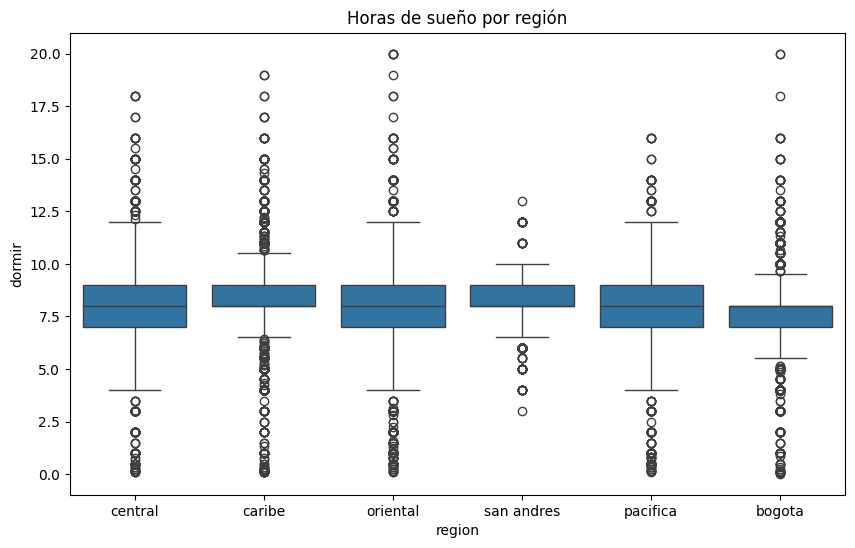

In [180]:
# Graficar cuanto duerme cada region

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_depurada['region'], y=data_depurada['dormir'])
plt.title('Horas de sueño por región')
plt.show()

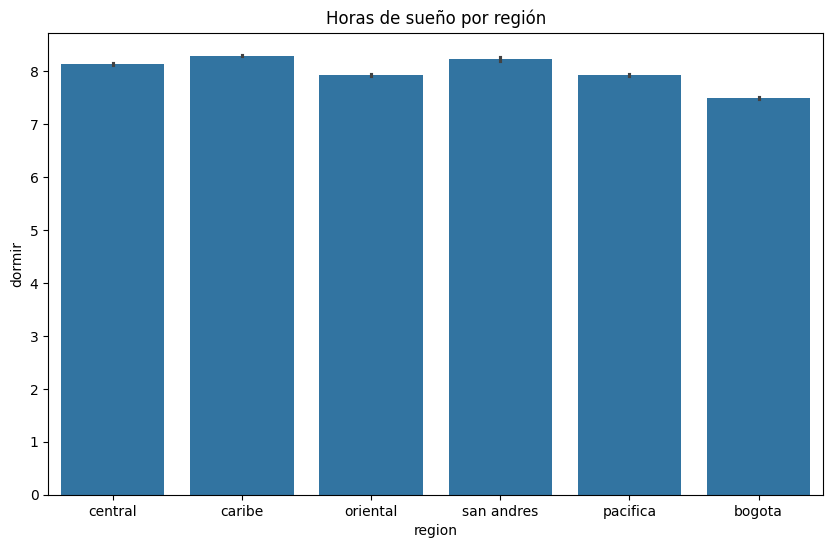

In [181]:
# Graficar cuanto duerme cada region con otro tipo de grafica

plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['dormir'])
plt.title('Horas de sueño por región')
plt.show()


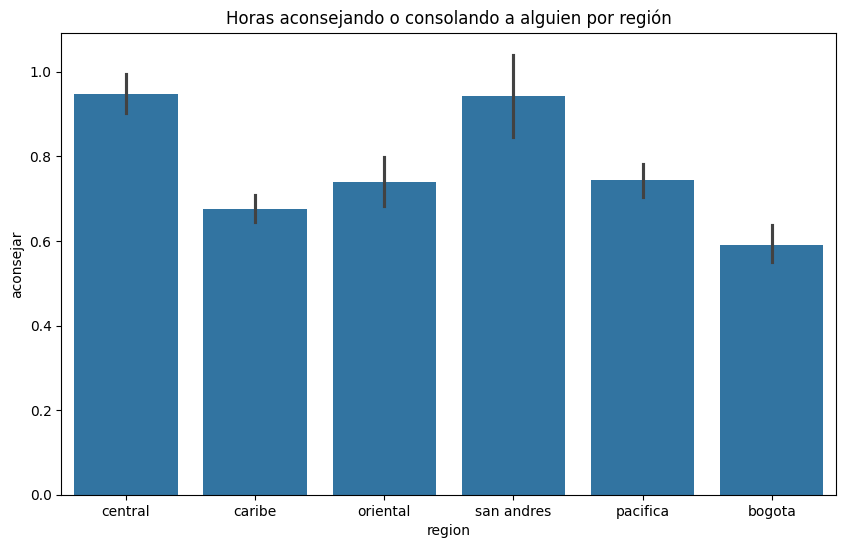

In [182]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['aconsejar'])
plt.title('Horas aconsejando o consolando a alguien por región')
plt.show()

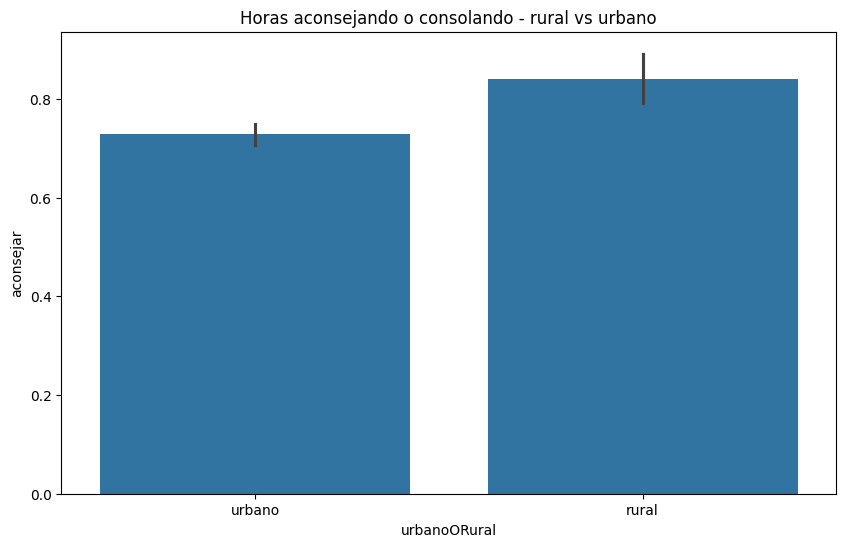

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['aconsejar'])
plt.title('Horas aconsejando o consolando - rural vs urbano')
plt.show()

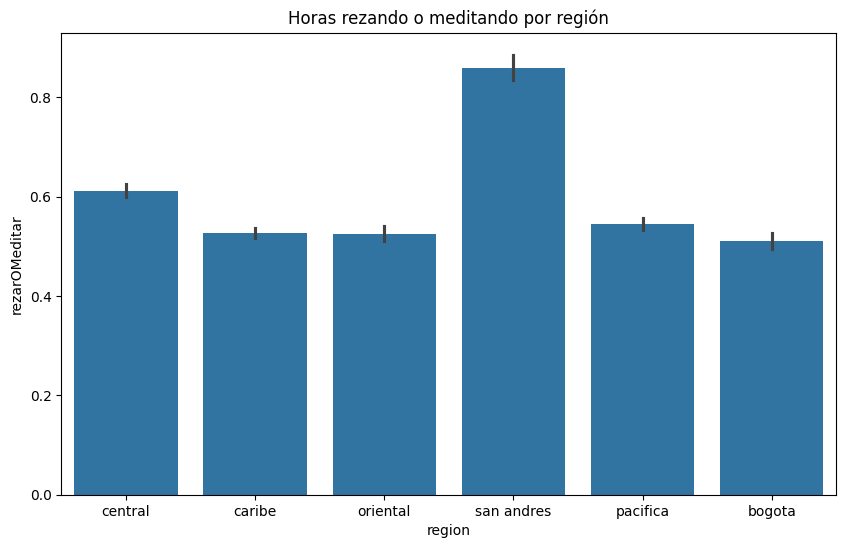

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando por región')
plt.show()

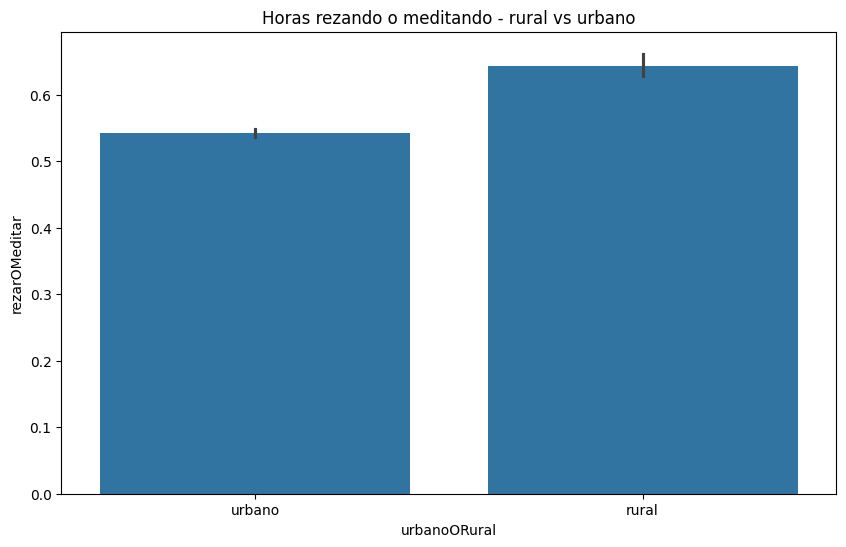

In [185]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando - rural vs urbano')
plt.show()

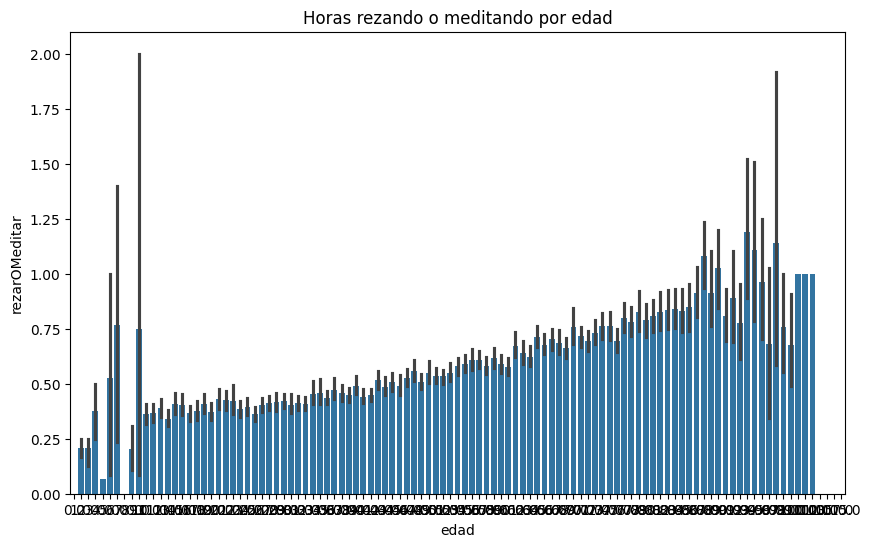

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando por edad')
plt.show()

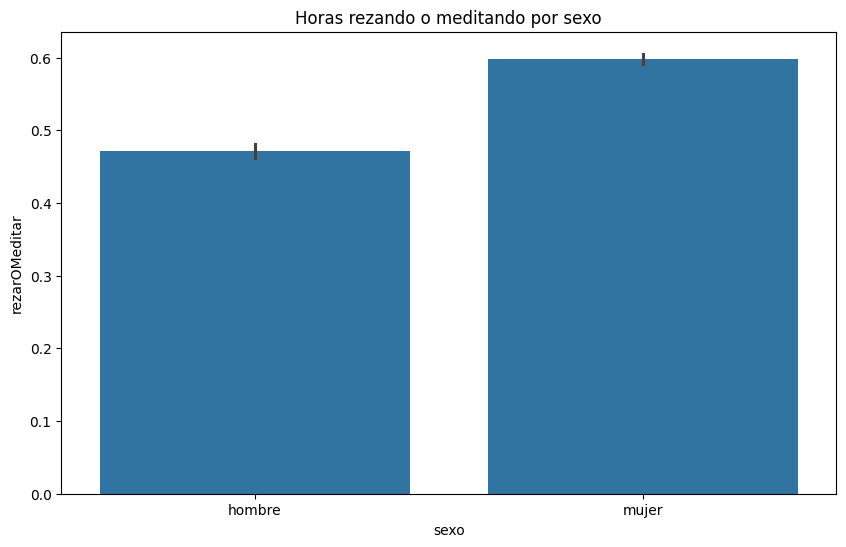

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando por sexo')
plt.show()

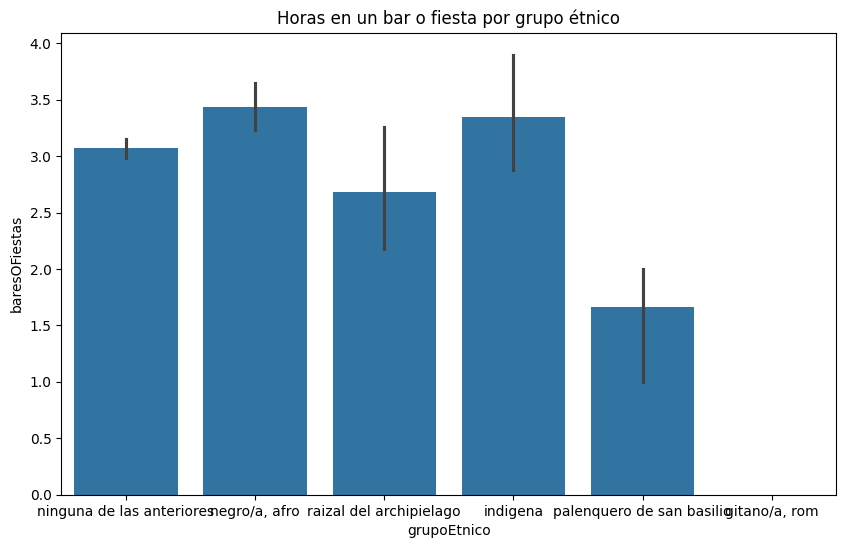

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['baresOFiestas'])
plt.title('Horas en un bar o fiesta por grupo étnico')
plt.show()

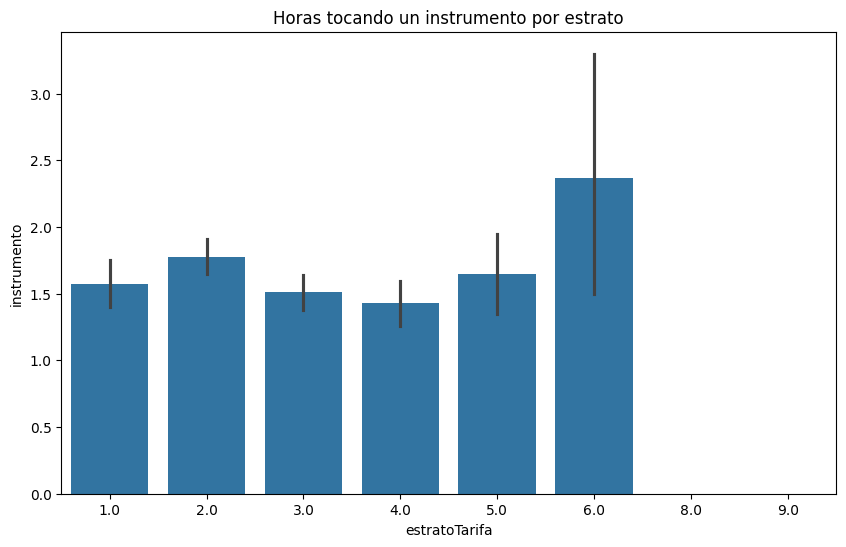

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['instrumento'])
plt.title('Horas tocando un instrumento por estrato')
plt.show()

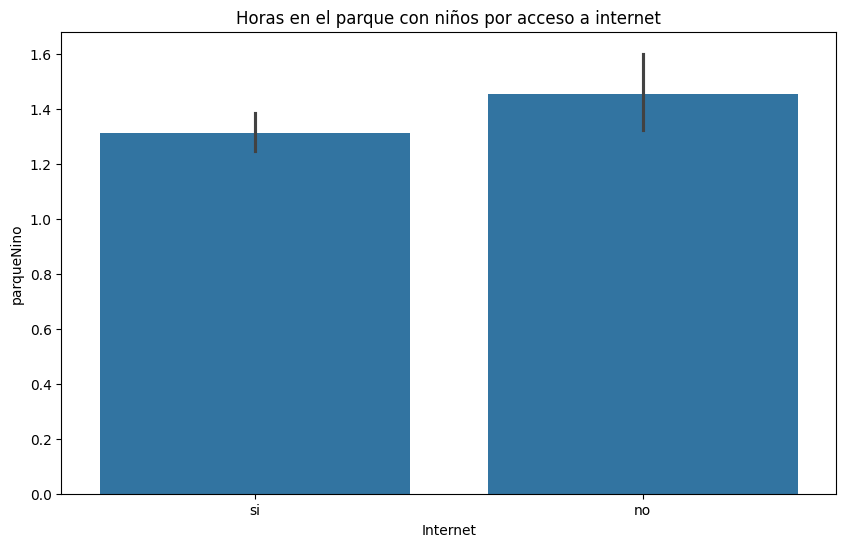

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['parqueNino'])
plt.title('Horas en el parque con niños por acceso a internet')
plt.show()

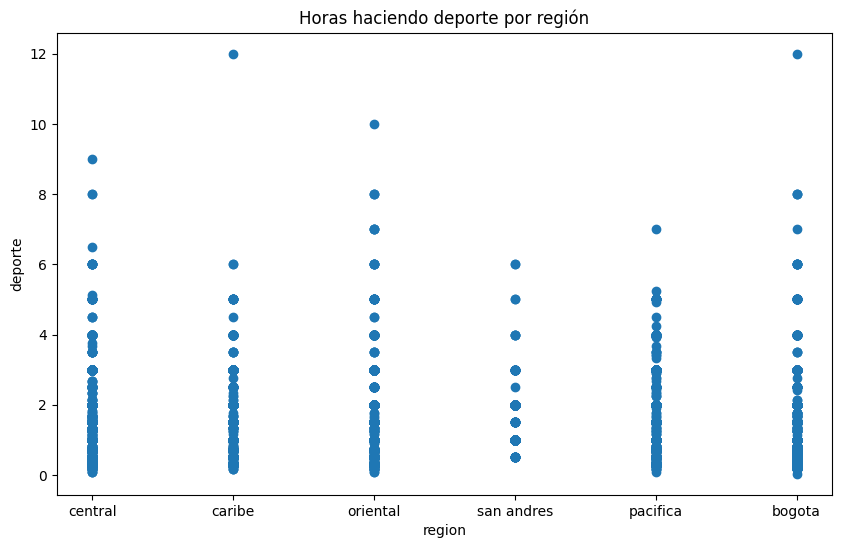

In [191]:
# Scatter Plot de region vs deporte
plt.figure(figsize=(10,6))
plt.scatter(data_depurada['region'], data_depurada['deporte'])
plt.title('Horas haciendo deporte por región')
plt.xlabel('region')
plt.ylabel('deporte')
plt.show()

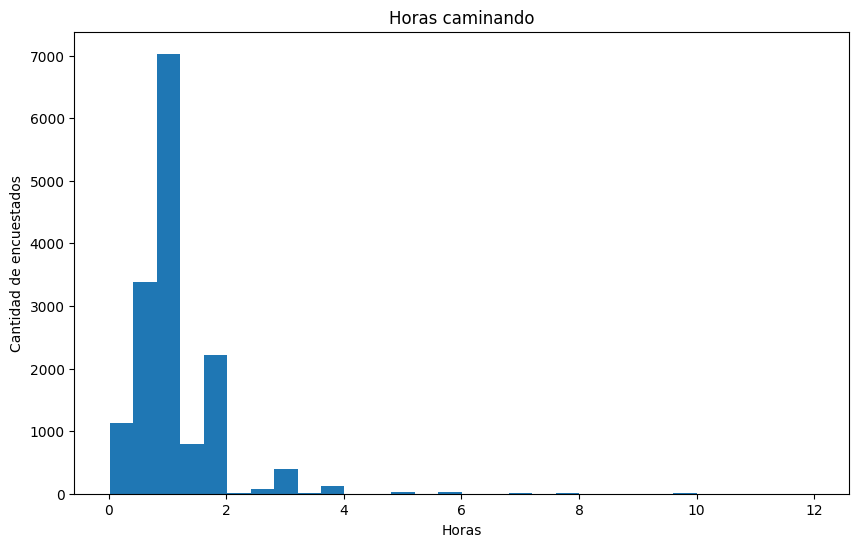

In [192]:
# Histograma de estrato vs caminar
plt.figure(figsize=(10,6))
plt.hist(data_depurada['caminar'], bins=30)
plt.title('Horas caminando')
plt.xlabel('Horas')
plt.ylabel('Cantidad de encuestados')
plt.show()

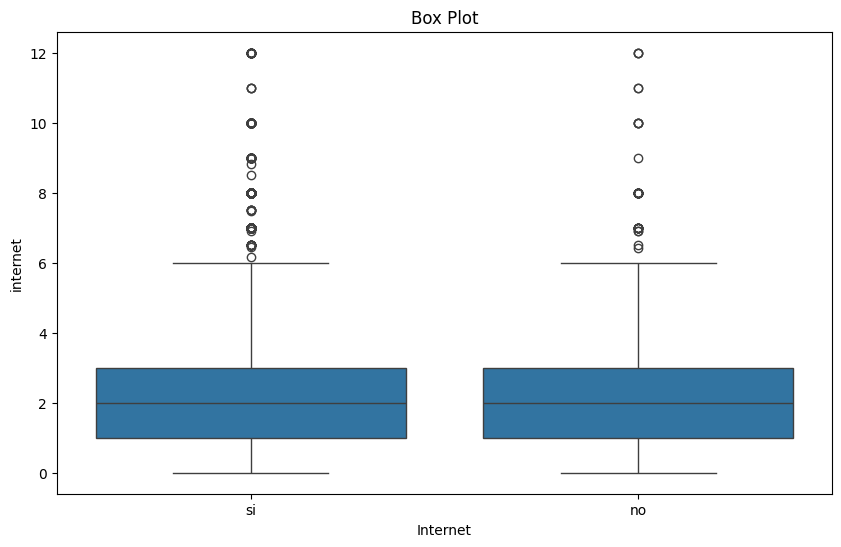

In [193]:
# Box Plot de acceso a internet vs horas navegando internet
plt.figure(figsize=(10,6))
sns.boxplot(x=data_depurada['Internet'], y=data_depurada['internet'], data=data_depurada)
plt.title('Box Plot')
plt.show()

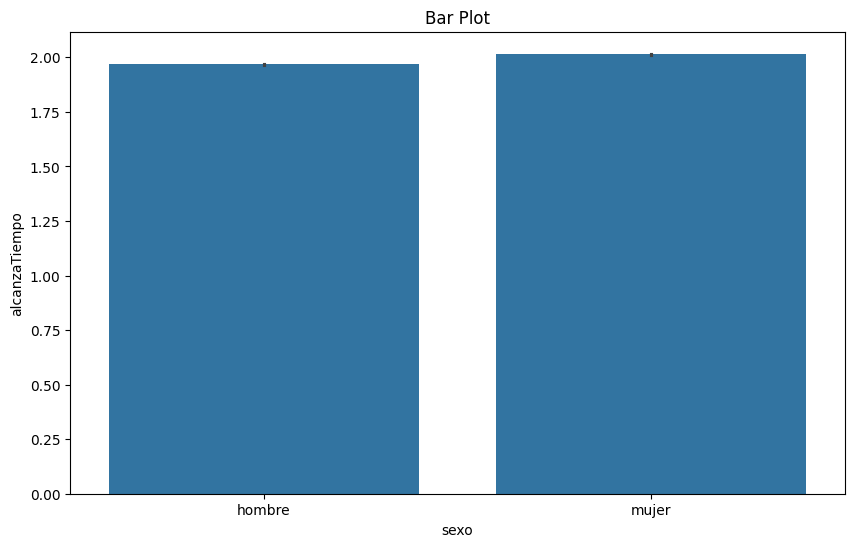

In [194]:
# Bar Plot de sexo vs si le alcanza el tiempo 
plt.figure(figsize=(10,6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['alcanzaTiempo'], data=data_depurada)
plt.title('Bar Plot')
plt.show()


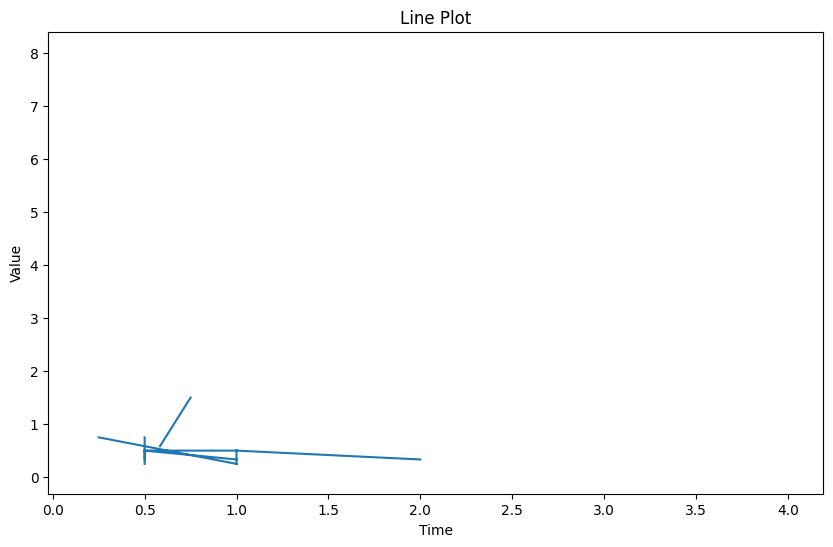

In [195]:
# Line Plot de leer vs tiempo leyendolo a niños
plt.figure(figsize=(10,6))
plt.plot(data_depurada['leer'], data_depurada['cuentosNino'])
plt.title('Line Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

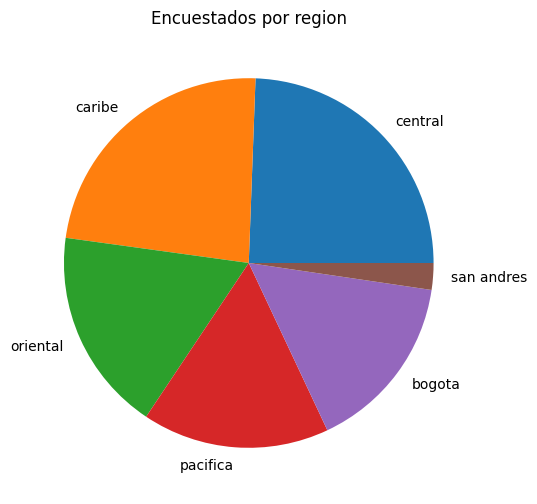

In [196]:
# Pie Chart de region vs cantidad de encuestados
plt.figure(figsize=(10,6))
plt.pie(data_depurada['region'].value_counts(), labels=data_depurada['region'].value_counts().index)
plt.title('Encuestados por region')
plt.show()

In [197]:
# Se crea un modelo de regresión lineal para predecir las horas de sueño

# Se separa el conjunto de datos en entrenamiento y test
#X = data_depurada[['edad', 'sexo', 'grupoEtnico', 'region', 'urbanoORural', 'estratoTarifa', 'Internet']]
#y = data_depurada['dormir']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crea un modelo de regresión lineal
#reg = LinearRegression()

# Se entrena el modelo
#reg.fit(X_train, y_train)

# Se realizan las predicciones
#y_pred = reg.predict(X_test)

# Se calculan las métricas
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f'MSE: {mse}')
#print(f'MAE: {mae}')
#print(f'R2: {r2}')

## Algunas tendencias encontradas

Cosas que disminuyen a medida que el estrato aumenta:

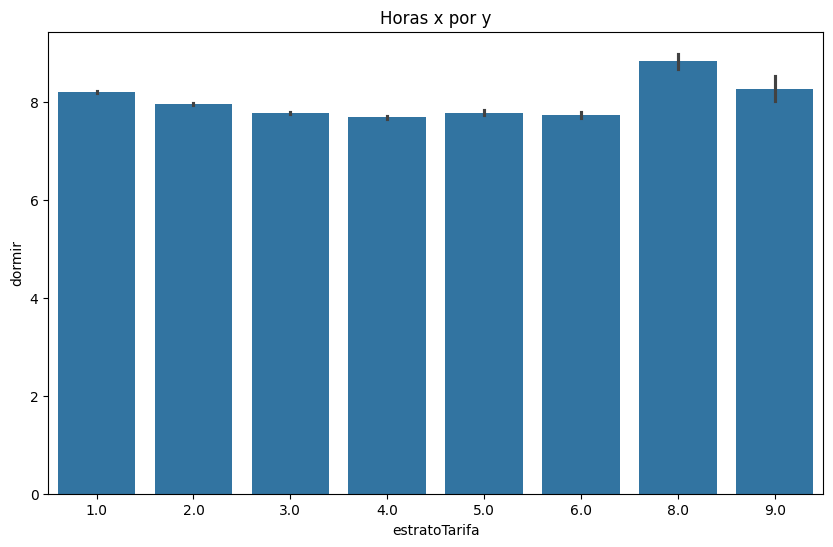

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['dormir'])
plt.title('Horas x por y')
plt.show()

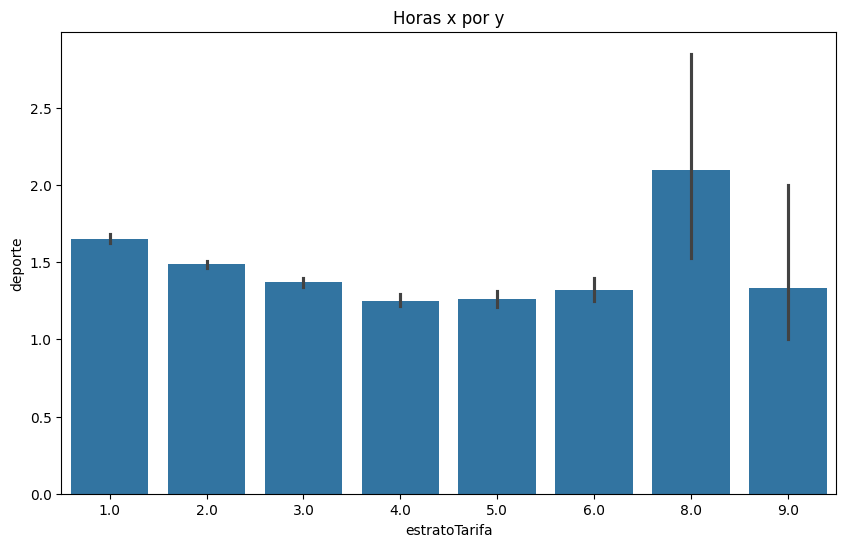

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['deporte'])
plt.title('Horas x por y')
plt.show()

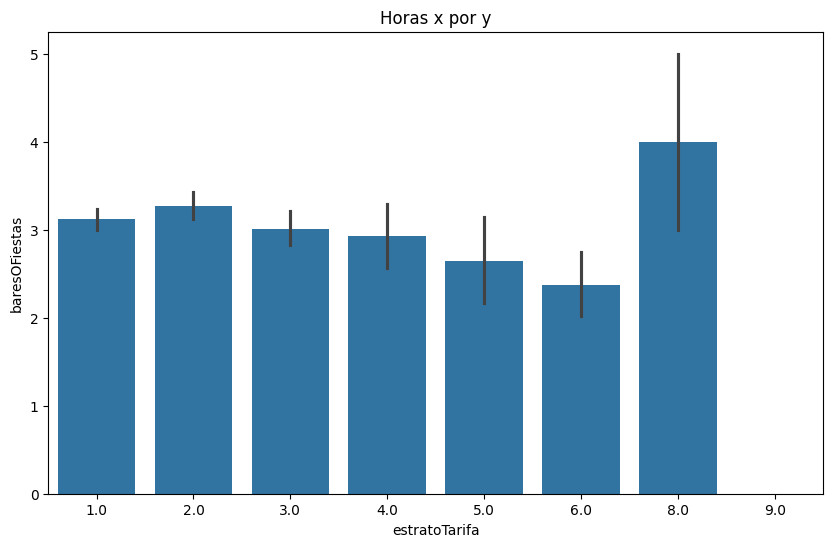

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['baresOFiestas'])
plt.title('Horas x por y')
plt.show()

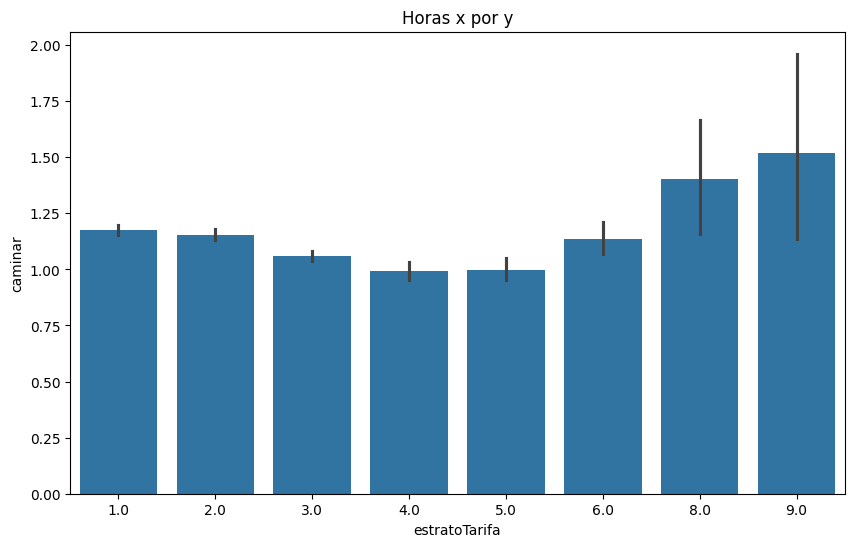

In [201]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['caminar'])
plt.title('Horas x por y')
plt.show()

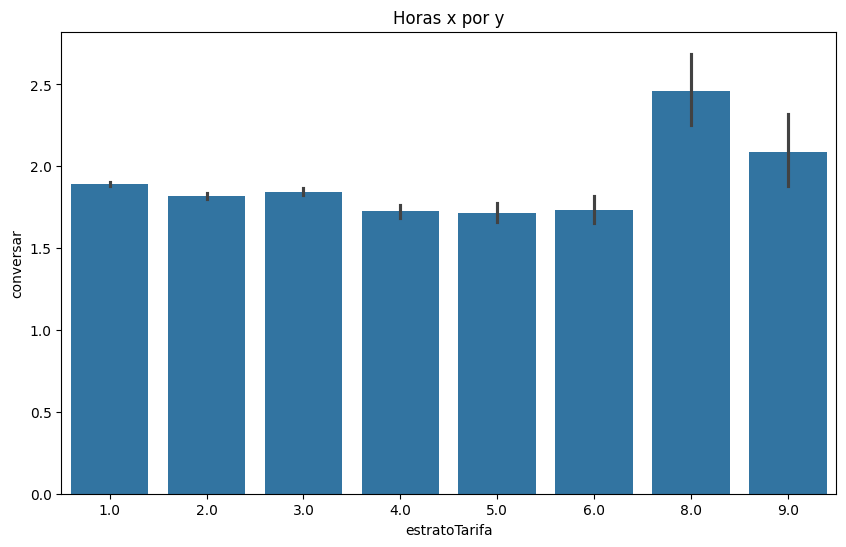

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['conversar'])
plt.title('Horas x por y')
plt.show()

Cosas que disminuyen a medida que el la conexión a internet aumenta:

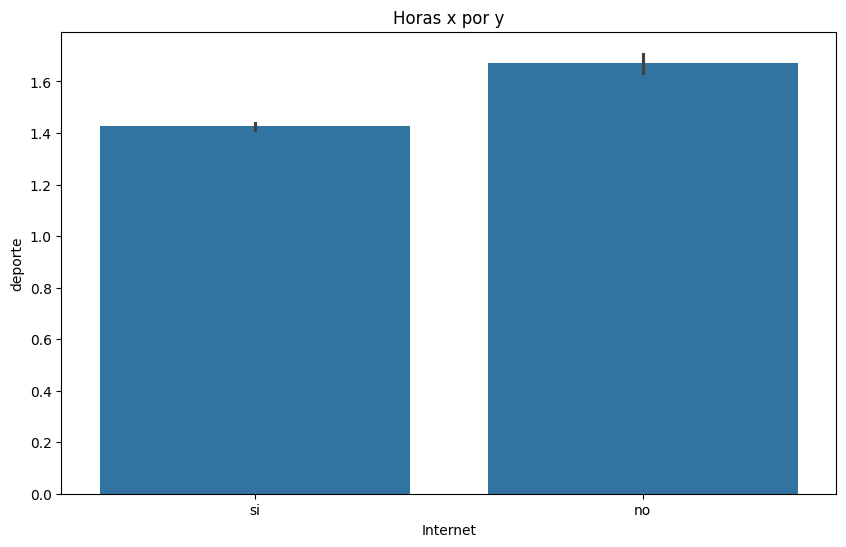

In [203]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['deporte'])
plt.title('Horas x por y')
plt.show()

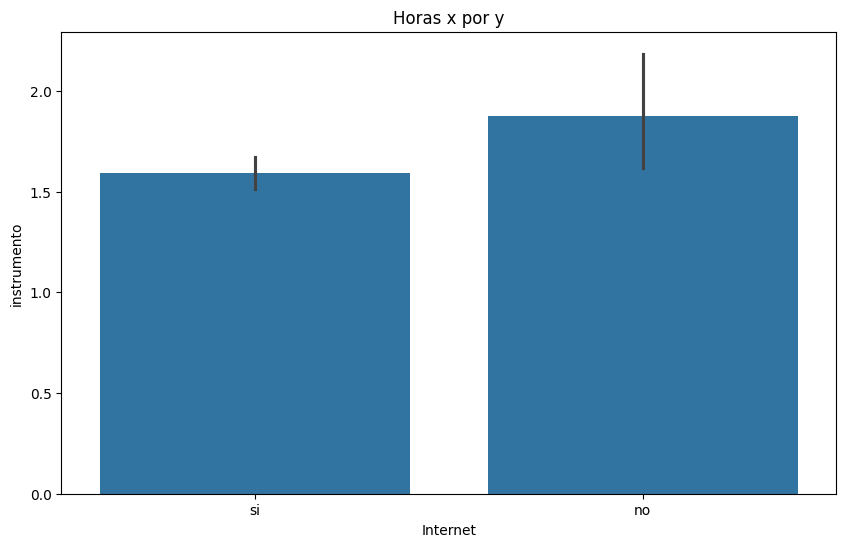

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['instrumento'])
plt.title('Horas x por y')
plt.show()

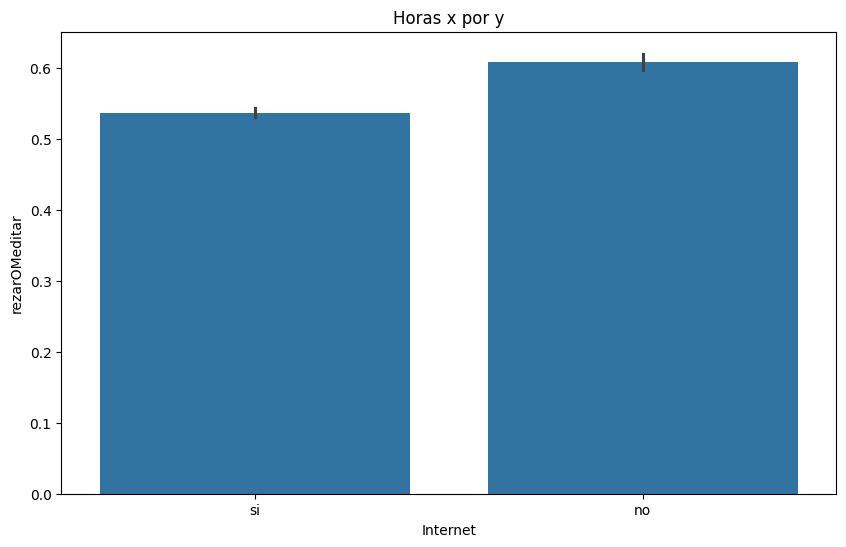

In [205]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['rezarOMeditar'])
plt.title('Horas x por y')
plt.show()

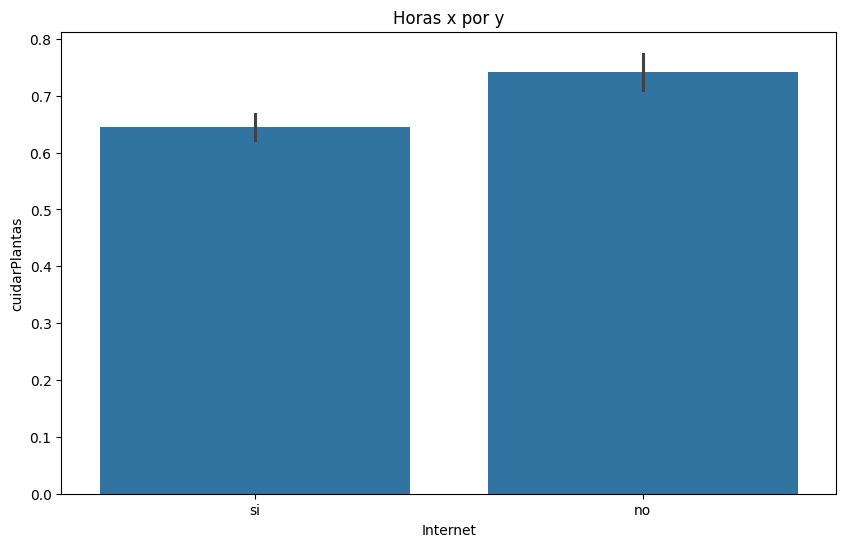

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarPlantas'])
plt.title('Horas x por y')
plt.show()

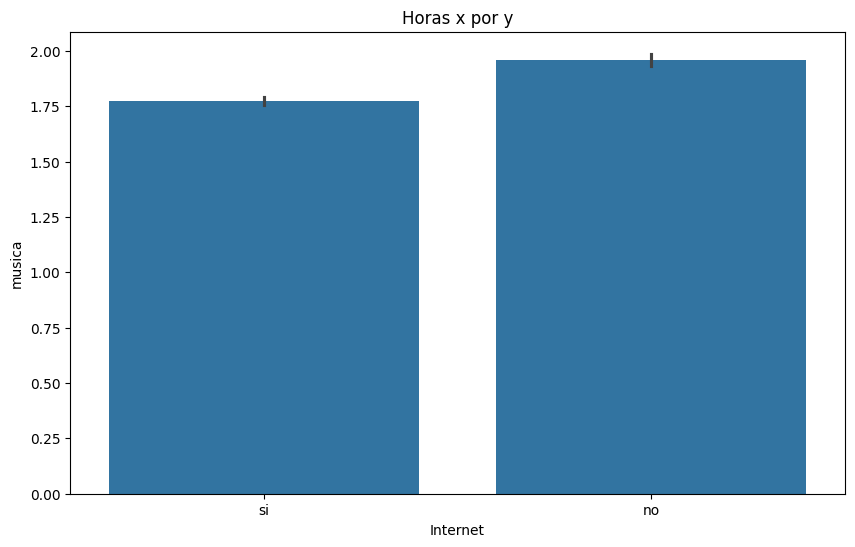

In [207]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['musica'])
plt.title('Horas x por y')
plt.show()

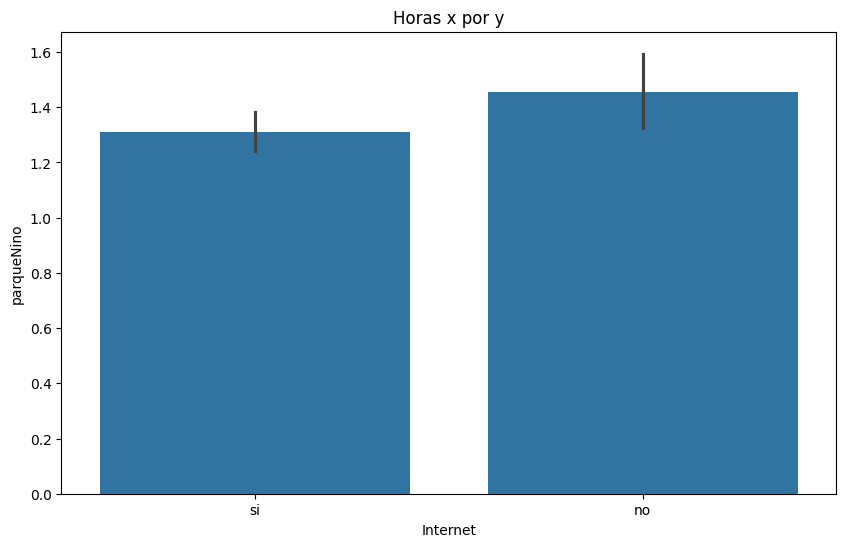

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['parqueNino'])
plt.title('Horas x por y')
plt.show()

Los Rom:

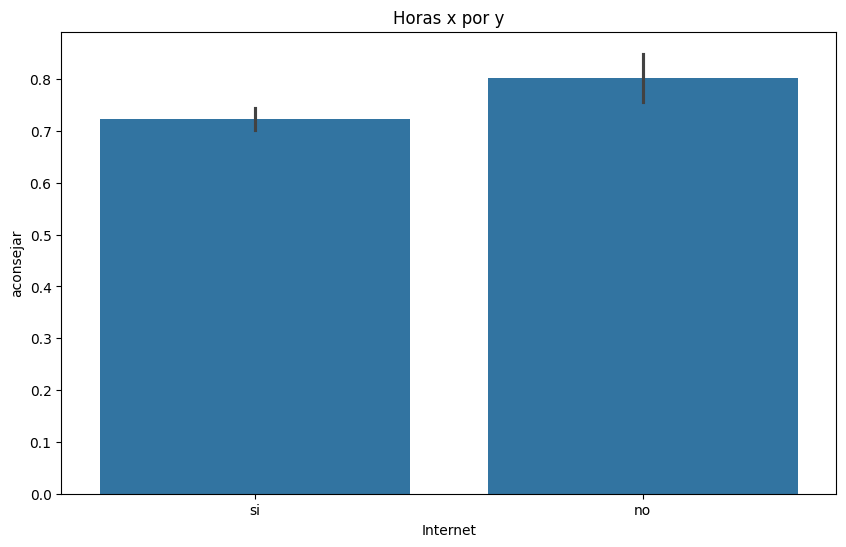

In [209]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['aconsejar'])
plt.title('Horas x por y')
plt.show()

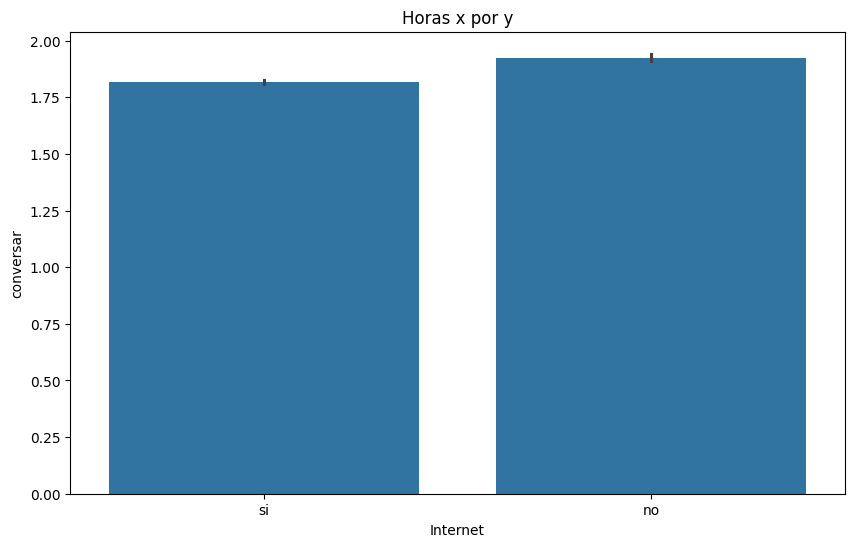

In [210]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['conversar'])
plt.title('Horas x por y')
plt.show()

En contra de estereotipos:

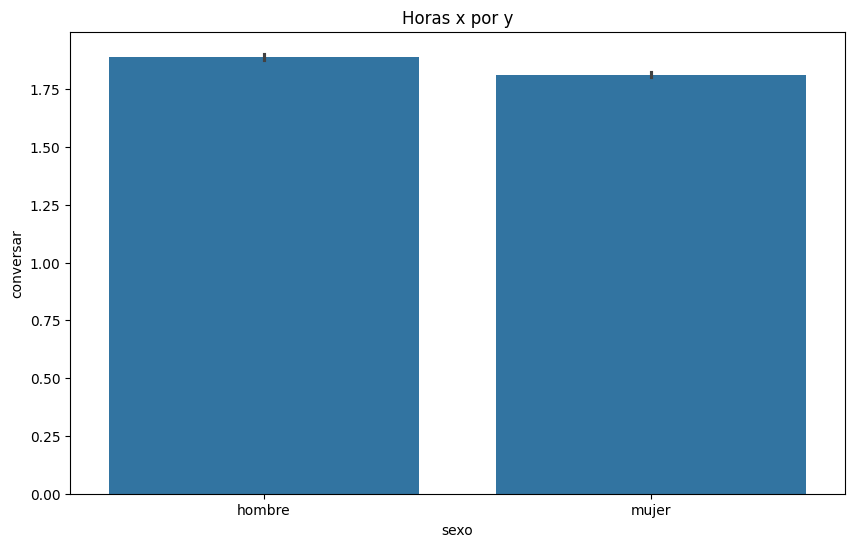

In [211]:
# Va contra el estereotipo de que las mujeres hablan mucho
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['conversar'])
plt.title('Horas x por y')
plt.show()

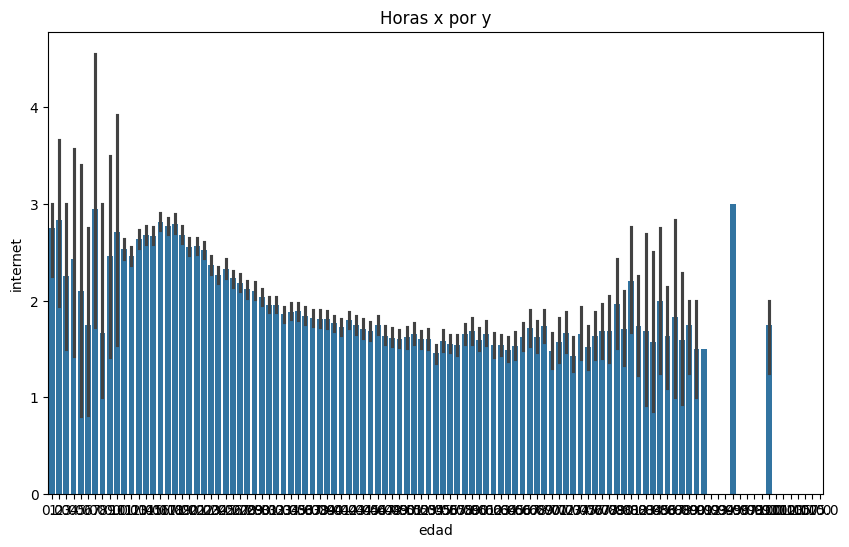

In [212]:
# Las personas mayores no parecen utilizar internet menos
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['internet'])
plt.title('Horas x por y')
plt.show()

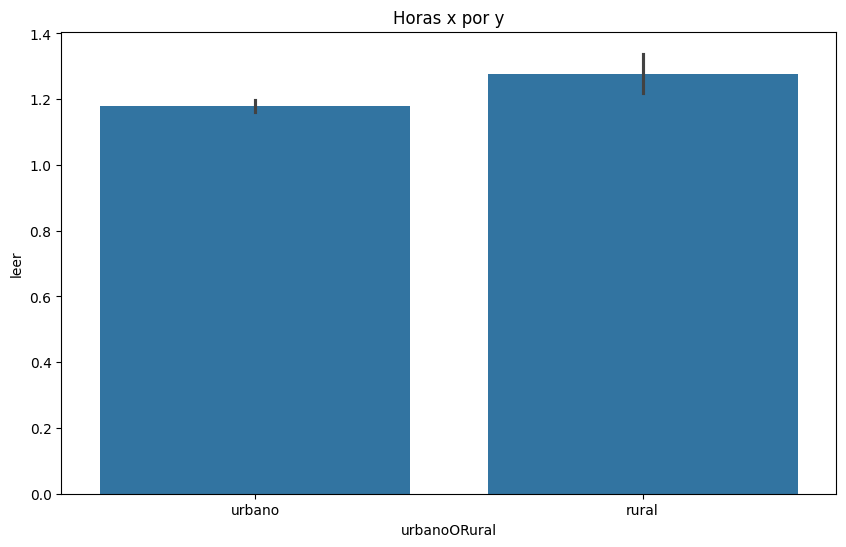

In [213]:
# La gente en el campo no lee
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['leer'])
plt.title('Horas x por y')
plt.show()

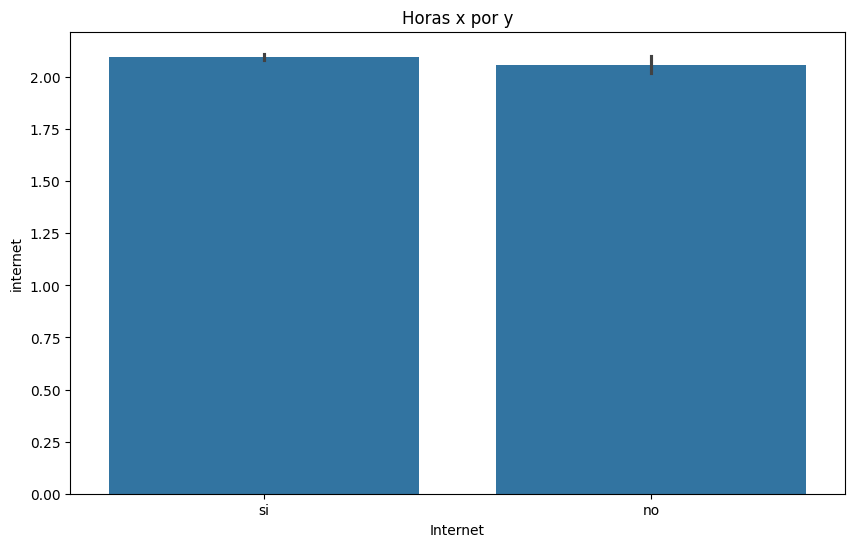

In [214]:
# La gente con y sin interenet en la casa parece navegar en internet el mismo tiempof
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['internet'])
plt.title('Horas x por y')
plt.show()

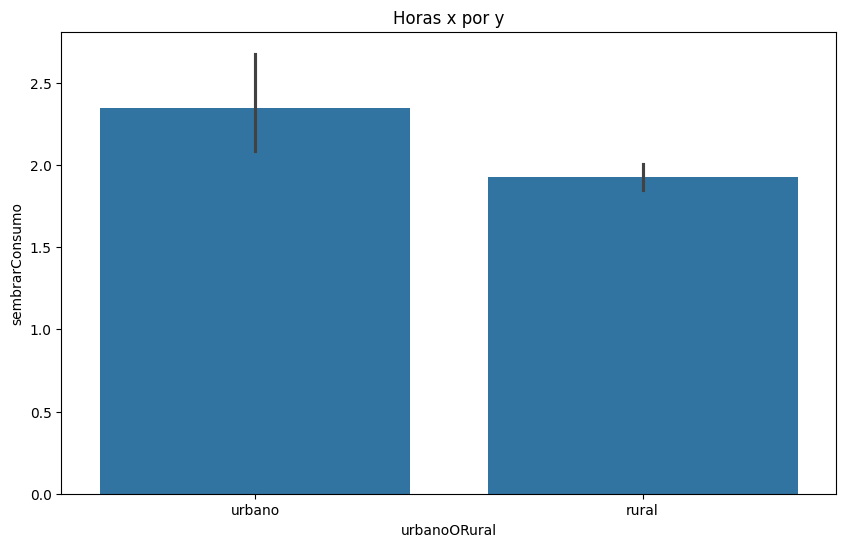

In [215]:
# Contra la idea de que en el campo se siembre su propia comida más que en la ciudad

plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['sembrarConsumo'])
plt.title('Horas x por y')
plt.show()

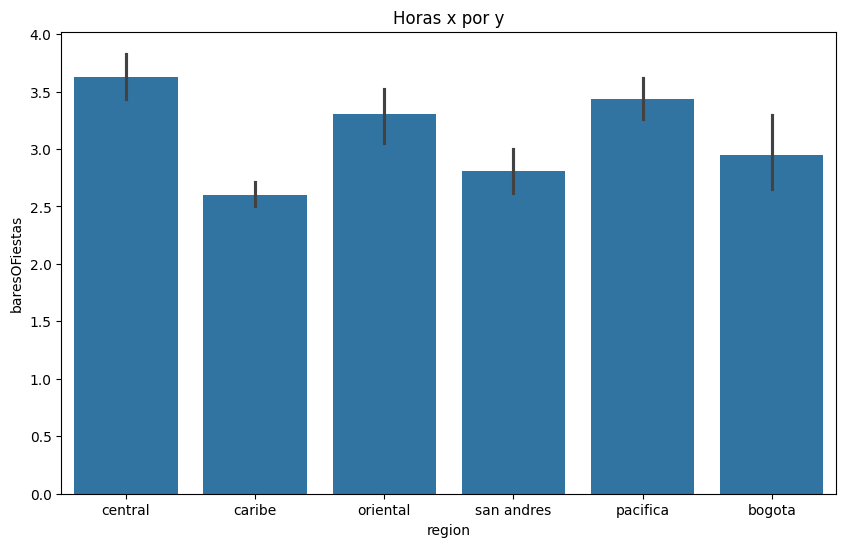

In [216]:
# Va contra estereotipos como el de los costeños rumberos
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['baresOFiestas'])
plt.title('Horas x por y')
plt.show()

Cosas que se hacen/dejan de hacer en Bogotá:

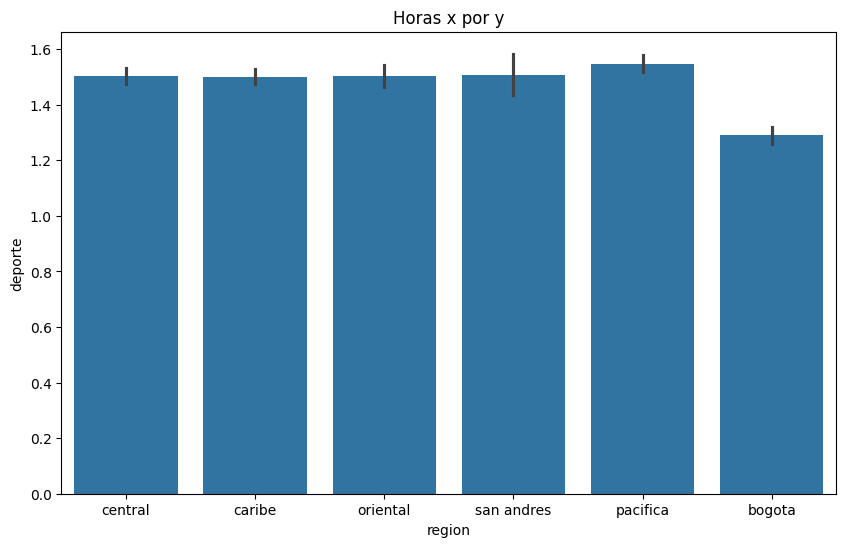

In [217]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['deporte'])
plt.title('Horas x por y')
plt.show()

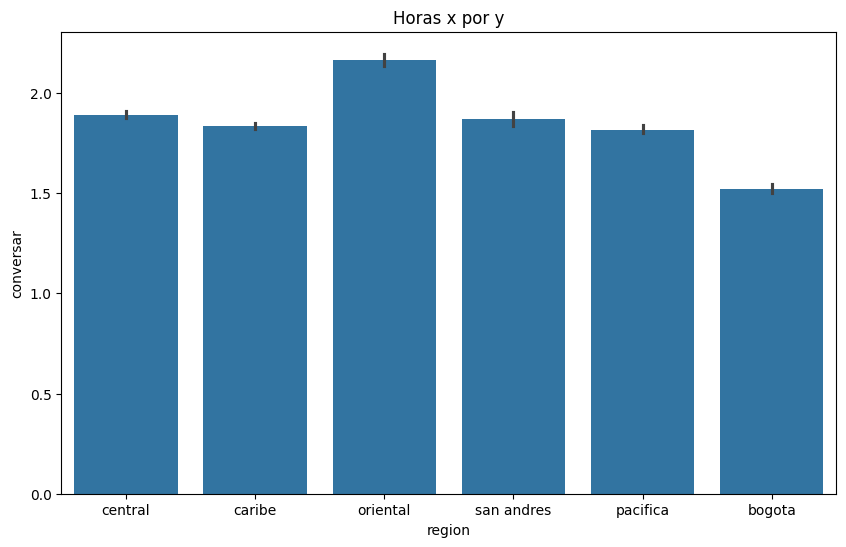

In [218]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['conversar'])
plt.title('Horas x por y')
plt.show()

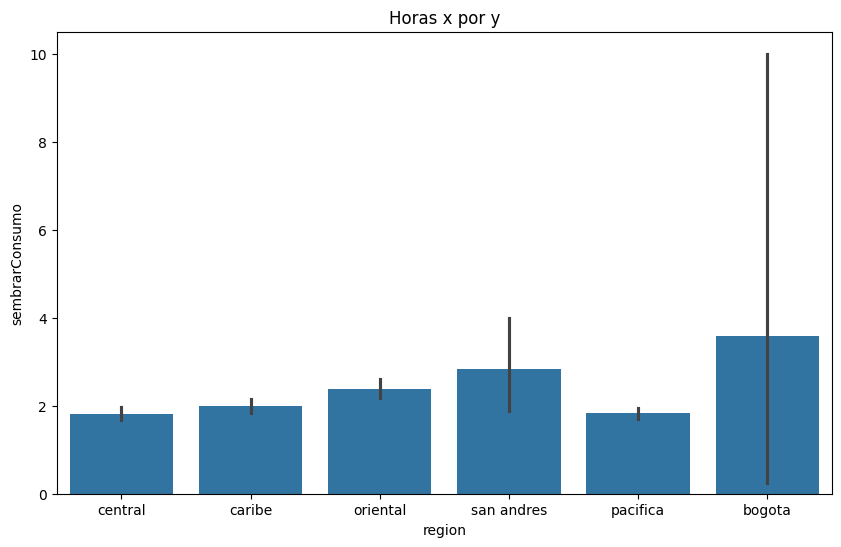

In [219]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['sembrarConsumo'])
plt.title('Horas x por y')
plt.show()

Privilegios de clase:

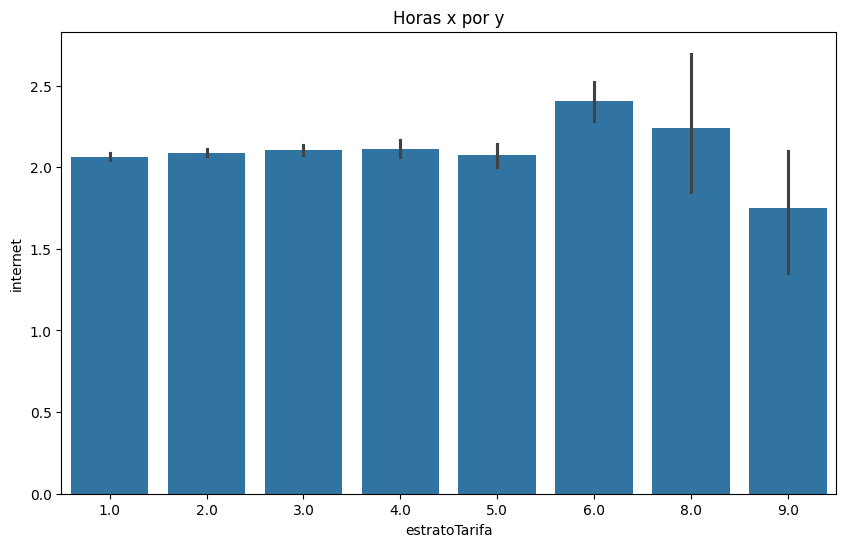

In [220]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['internet'])
plt.title('Horas x por y')
plt.show()

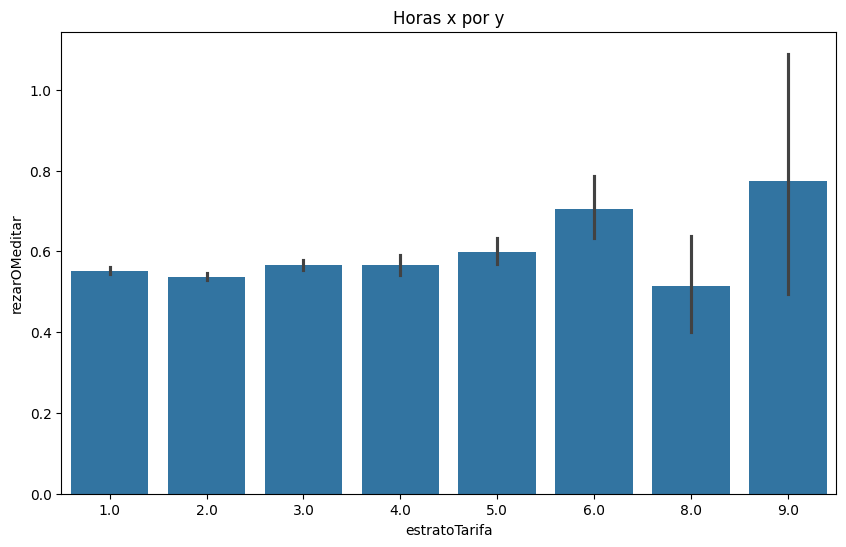

In [221]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['rezarOMeditar'])
plt.title('Horas x por y')
plt.show()

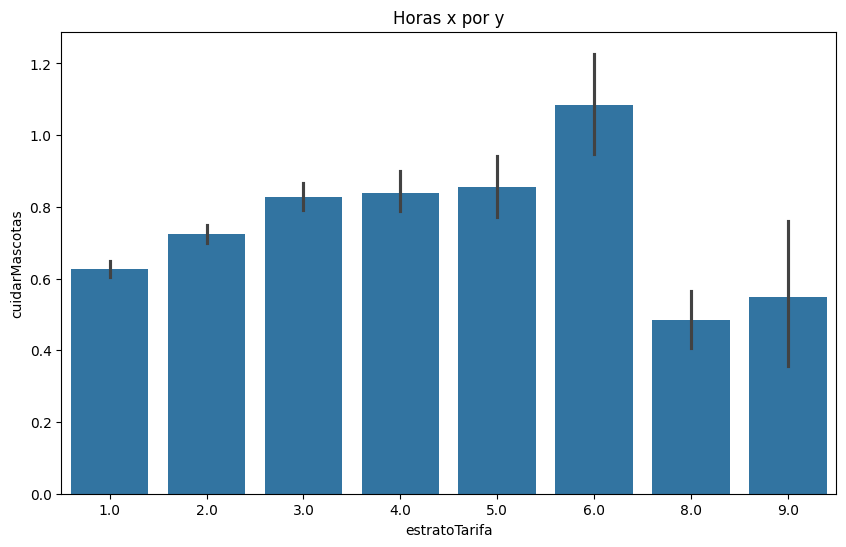

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['cuidarMascotas'])
plt.title('Horas x por y')
plt.show()

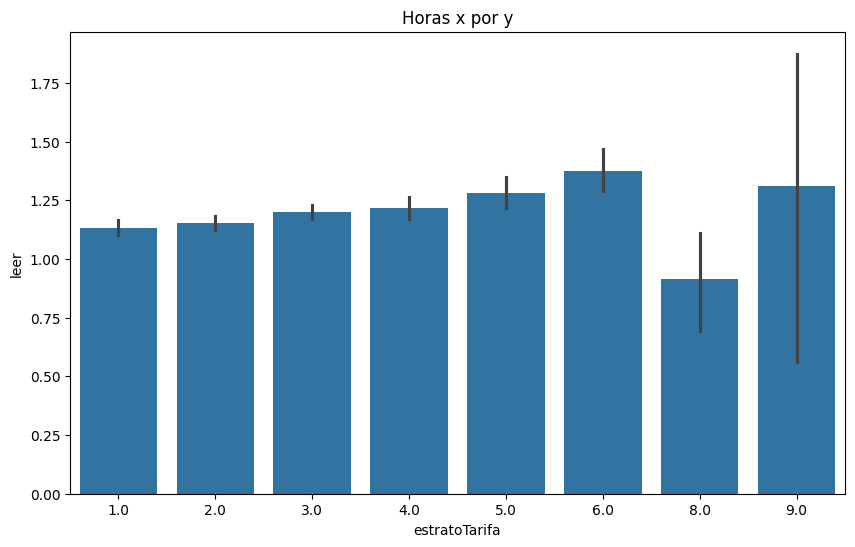

In [223]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['leer'])
plt.title('Horas x por y')
plt.show()

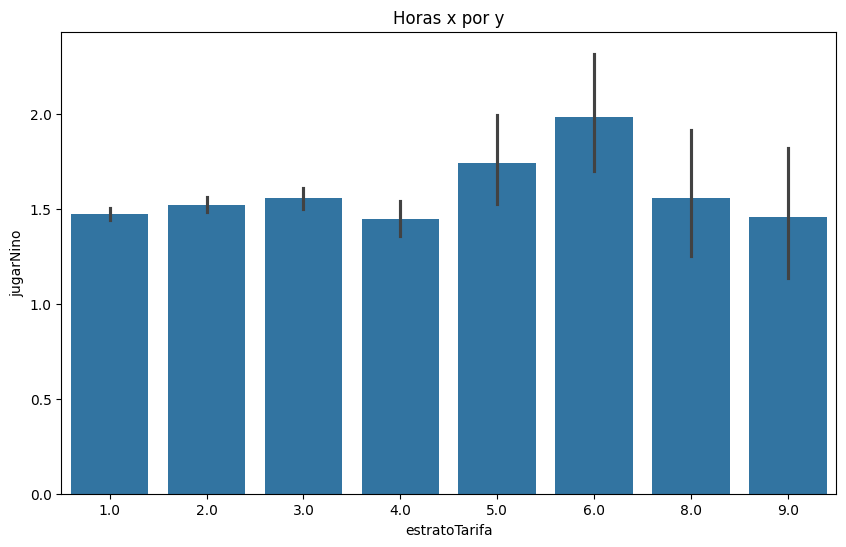

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['jugarNino'])
plt.title('Horas x por y')
plt.show()

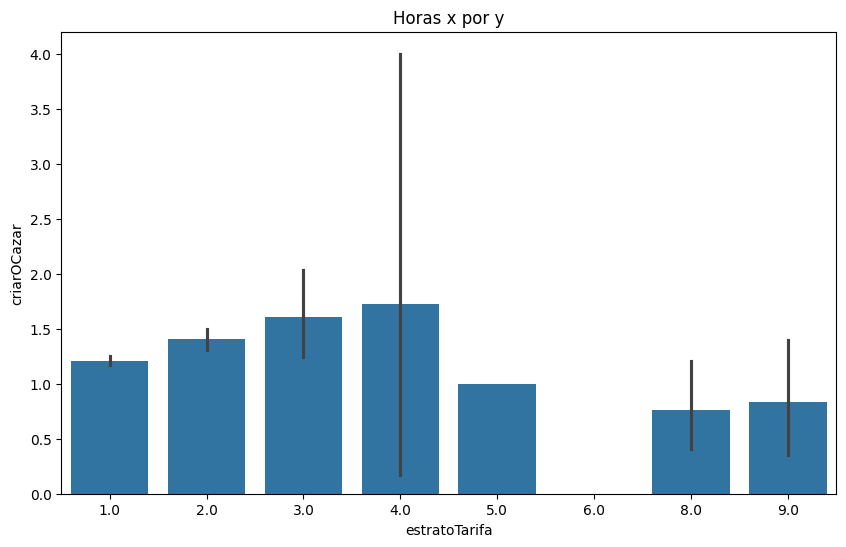

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['criarOCazar'])
plt.title('Horas x por y')
plt.show()

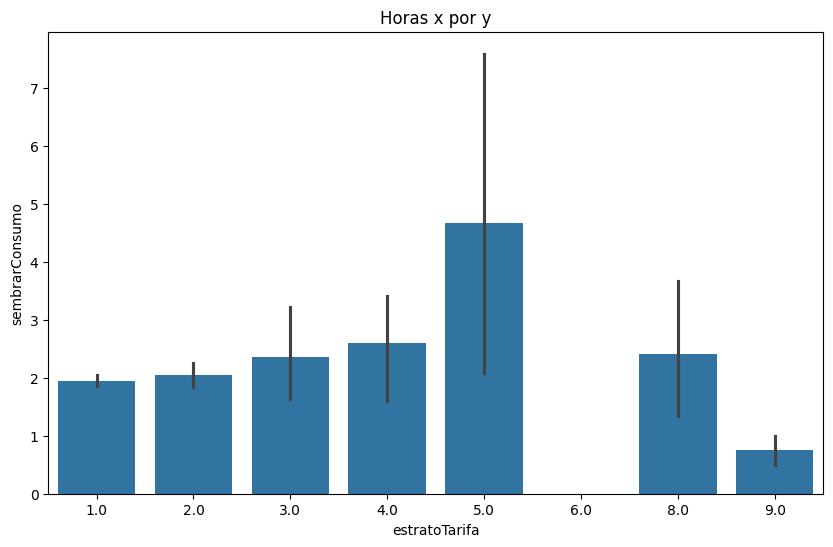

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['sembrarConsumo'])
plt.title('Horas x por y')
plt.show()

Los Rom:

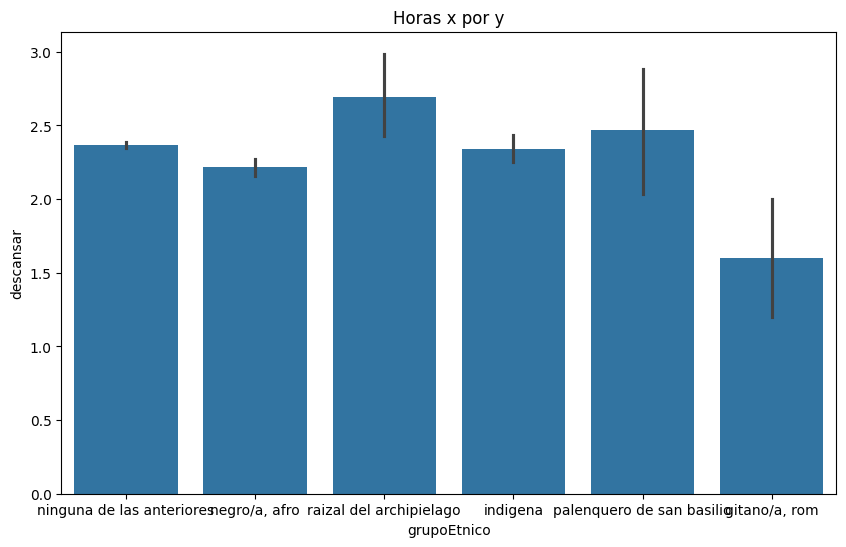

In [227]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['descansar'])
plt.title('Horas x por y')
plt.show()

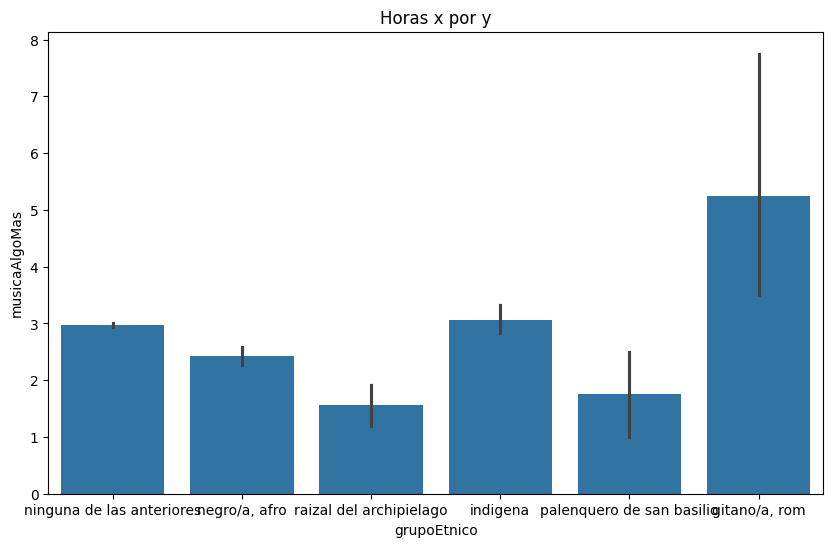

In [228]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['musicaAlgoMas'])
plt.title('Horas x por y')
plt.show()

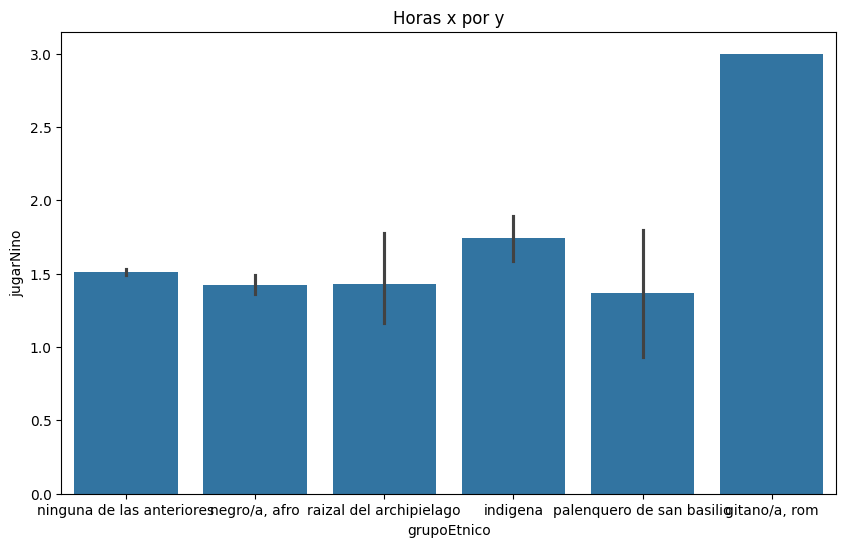

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['jugarNino'])
plt.title('Horas x por y')
plt.show()

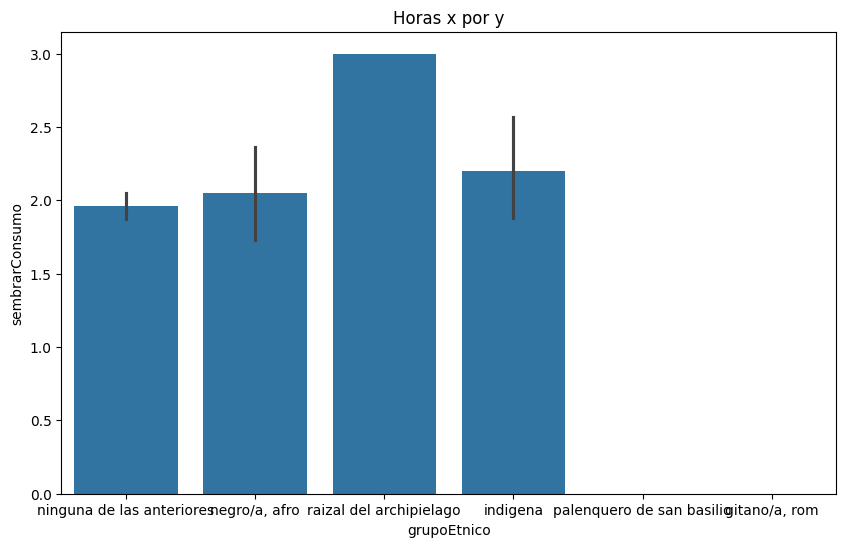

In [230]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['sembrarConsumo'])
plt.title('Horas x por y')
plt.show()

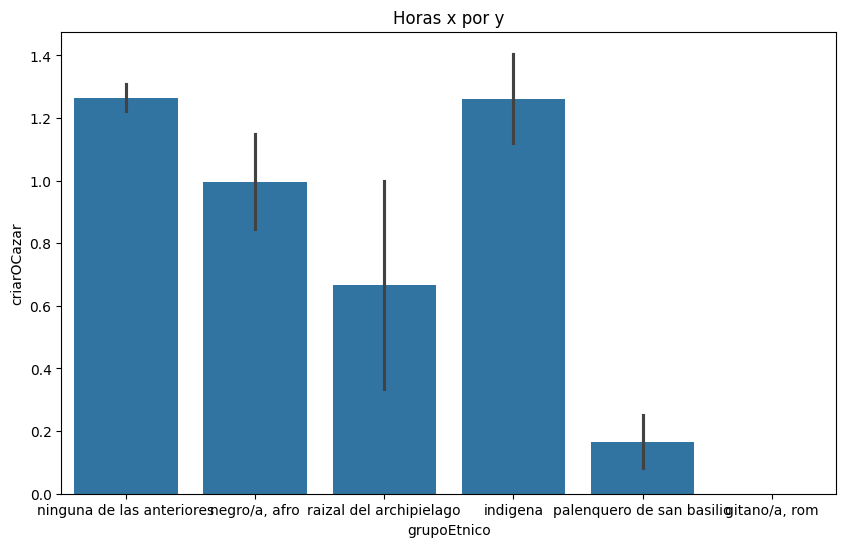

In [231]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['criarOCazar'])
plt.title('Horas x por y')
plt.show()

San Andrés:

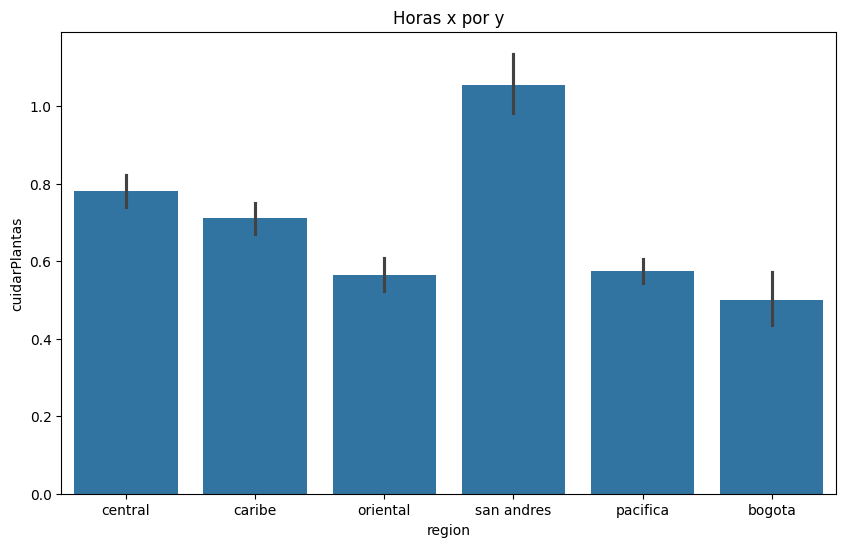

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuidarPlantas'])
plt.title('Horas x por y')
plt.show()

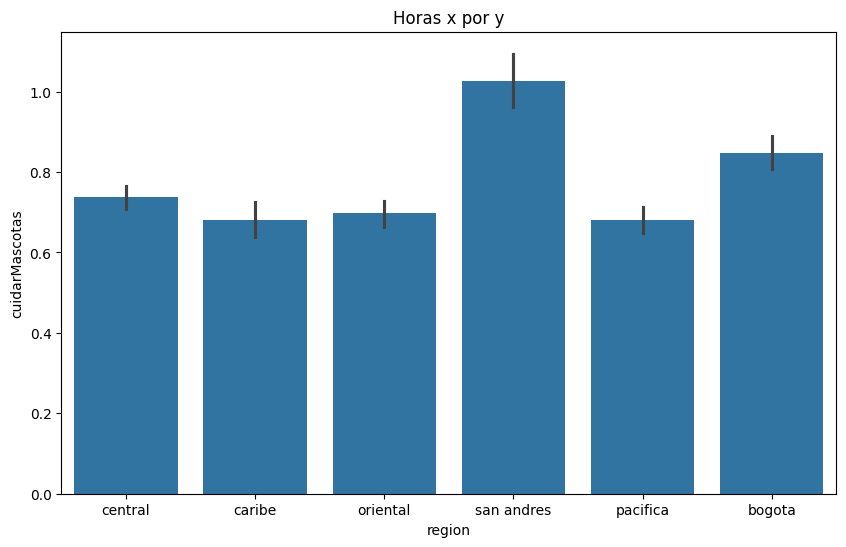

In [233]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuidarMascotas'])
plt.title('Horas x por y')
plt.show()

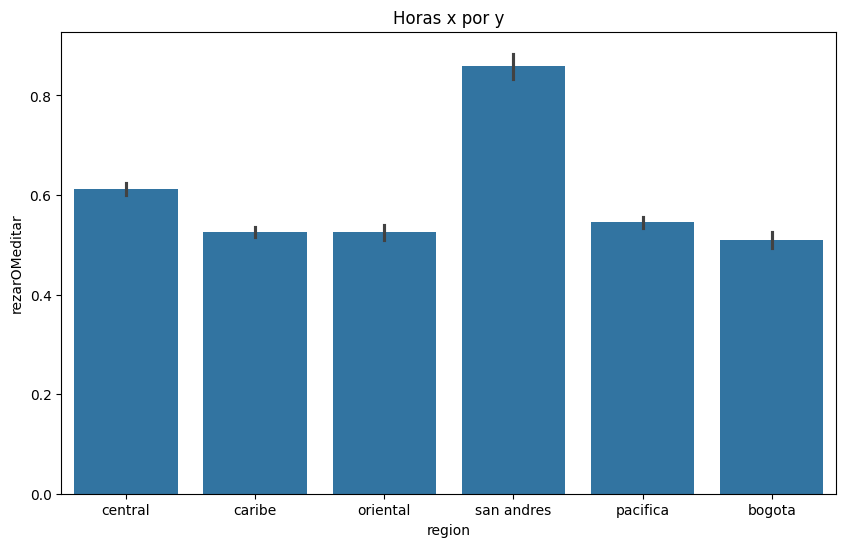

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['rezarOMeditar'])
plt.title('Horas x por y')
plt.show()

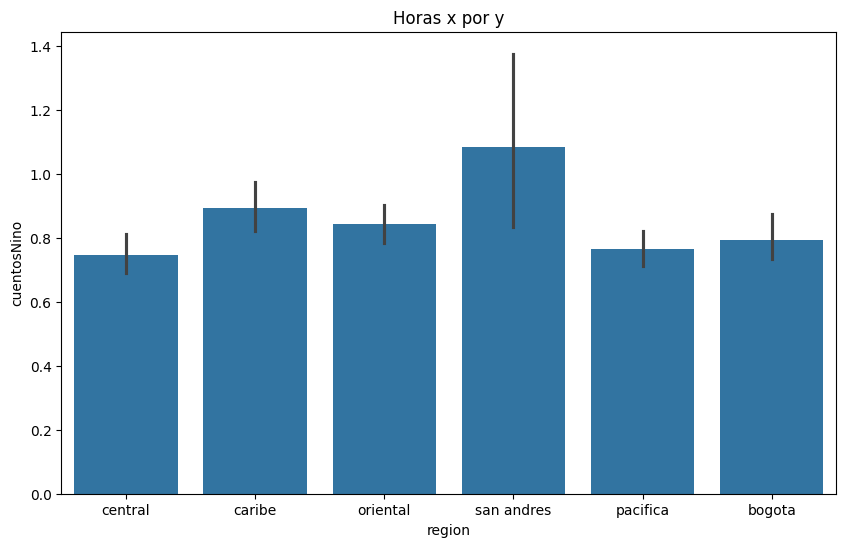

In [235]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuentosNino'])
plt.title('Horas x por y')
plt.show()

Cambios interesantes en la relación con la naturaleza con vs sin internet:

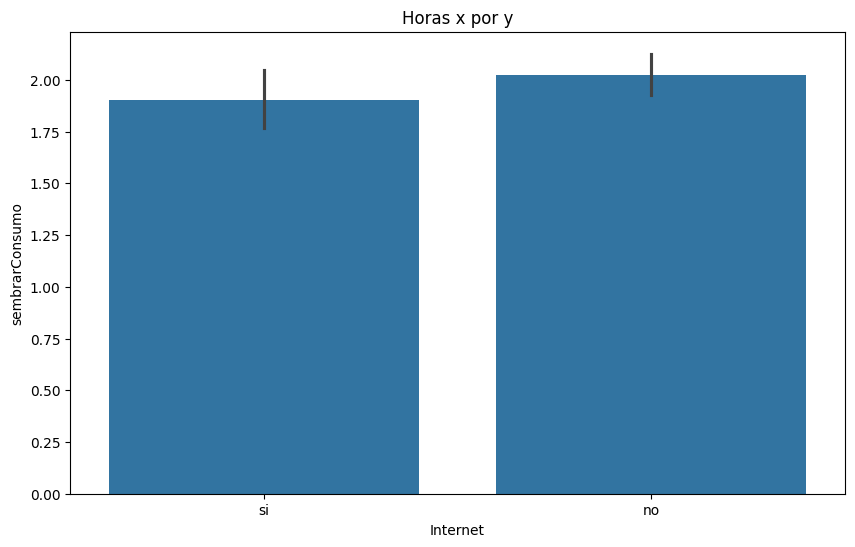

In [236]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['sembrarConsumo'])
plt.title('Horas x por y')
plt.show()

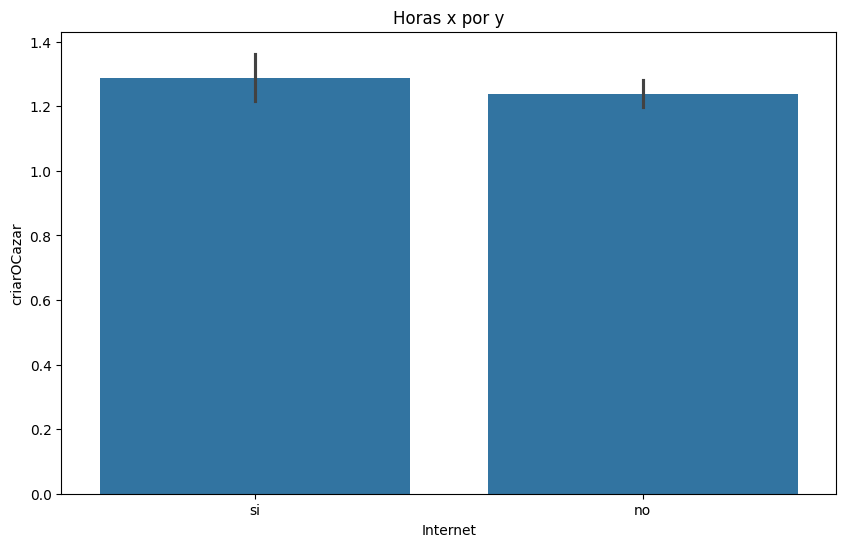

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['criarOCazar'])
plt.title('Horas x por y')
plt.show()

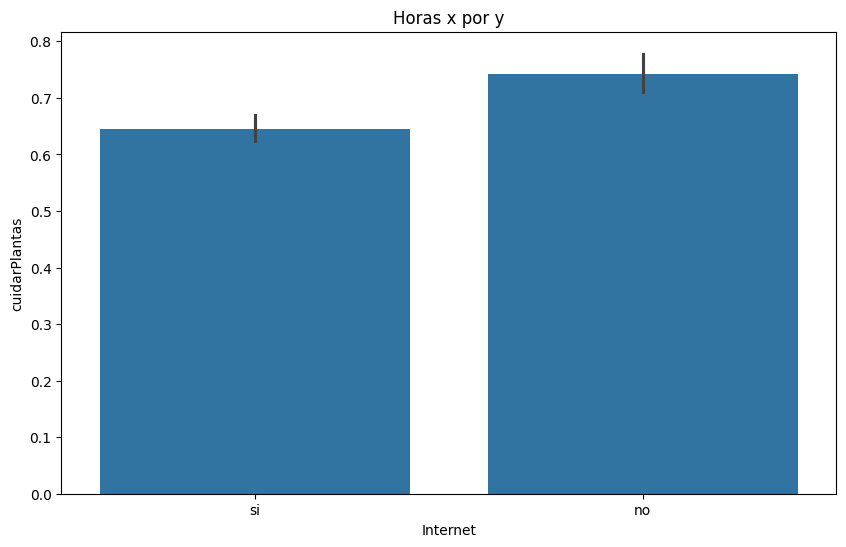

In [238]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarPlantas'])
plt.title('Horas x por y')
plt.show()

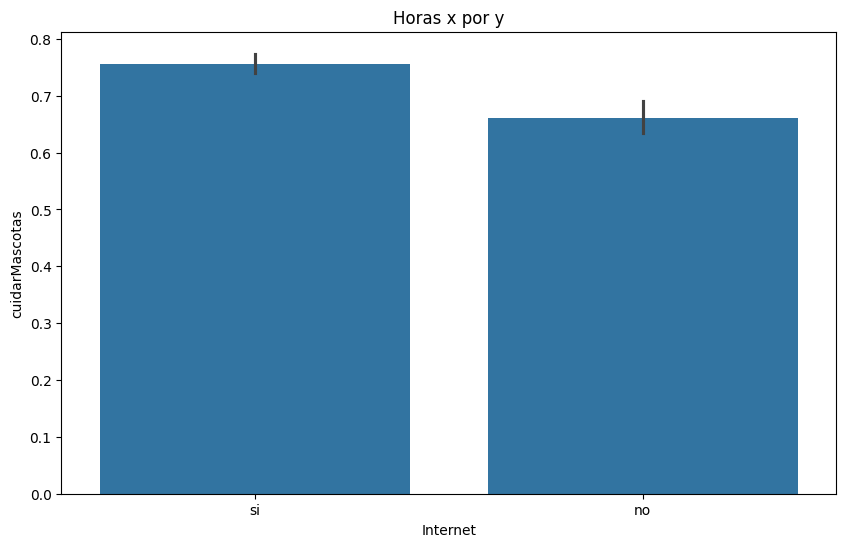

In [239]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarMascotas'])
plt.title('Horas x por y')
plt.show()

Fenómenos por edad:

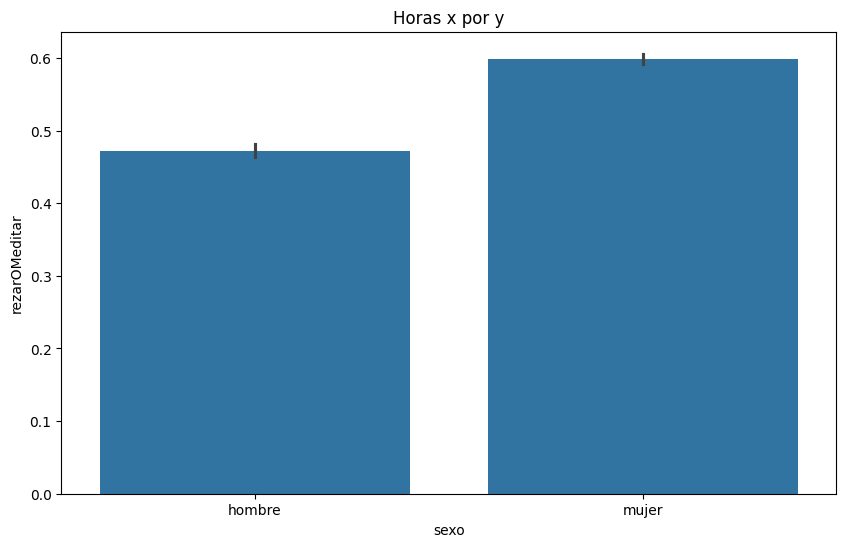

In [240]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['rezarOMeditar'])
plt.title('Horas x por y')
plt.show()

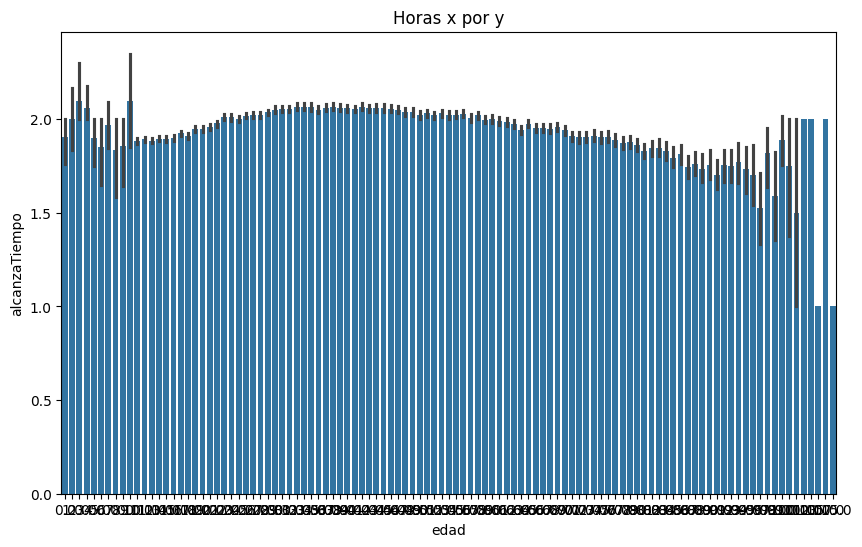

In [241]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

Al final, la percepción del tiempo es muy similar entre todos los grupos:

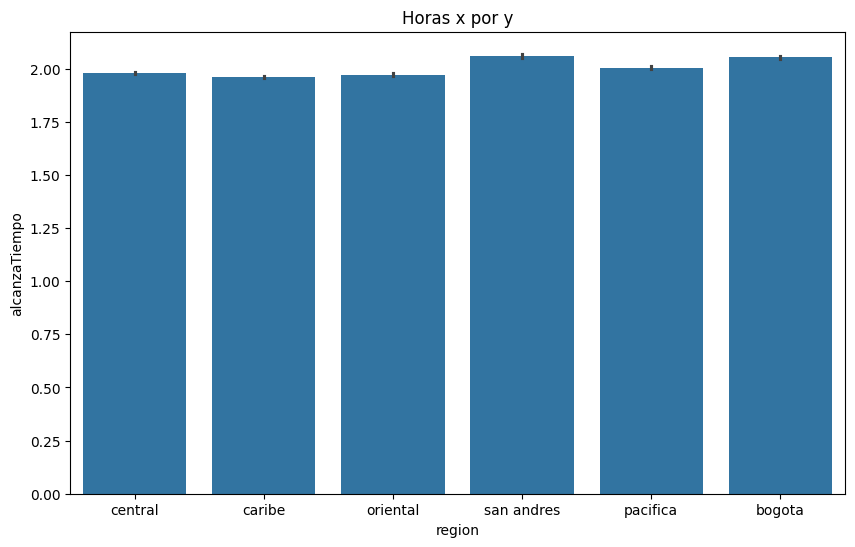

In [242]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

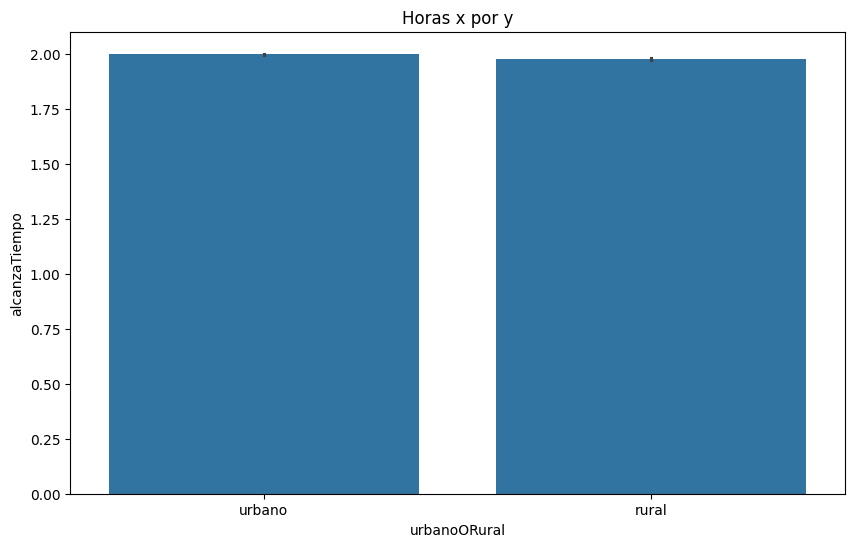

In [243]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

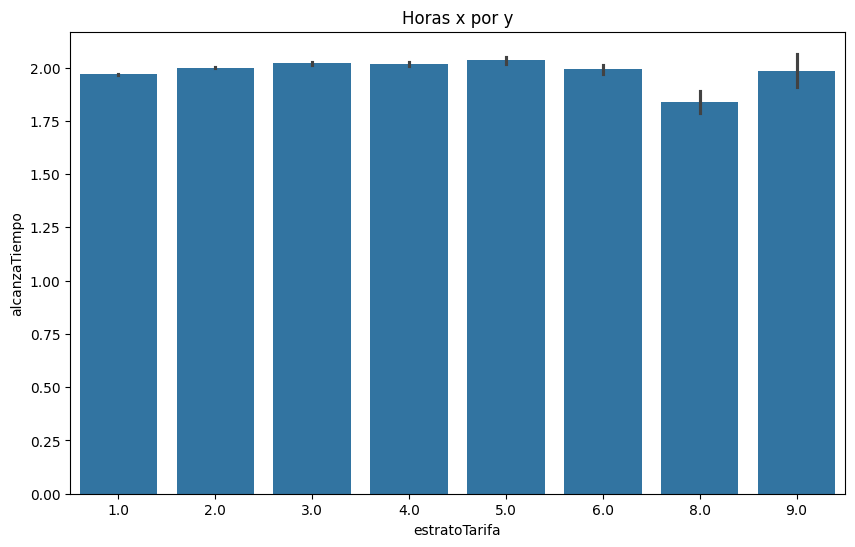

In [244]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

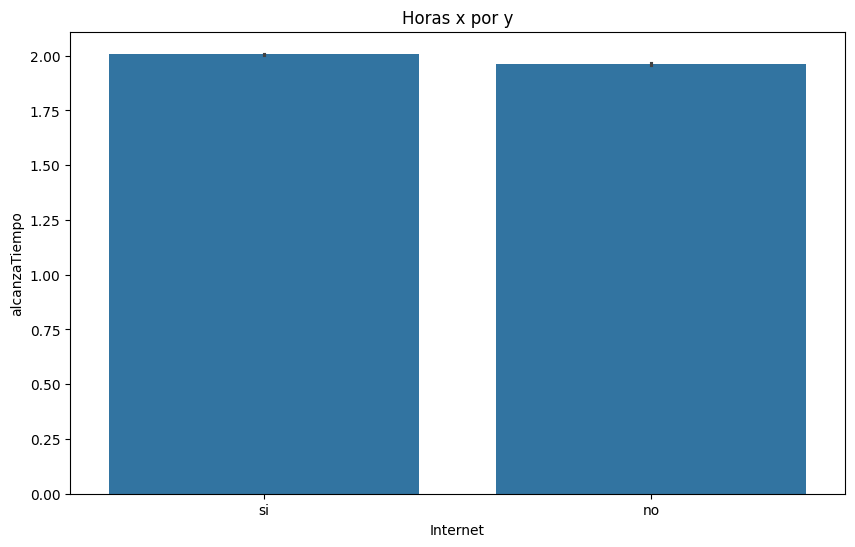

In [245]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

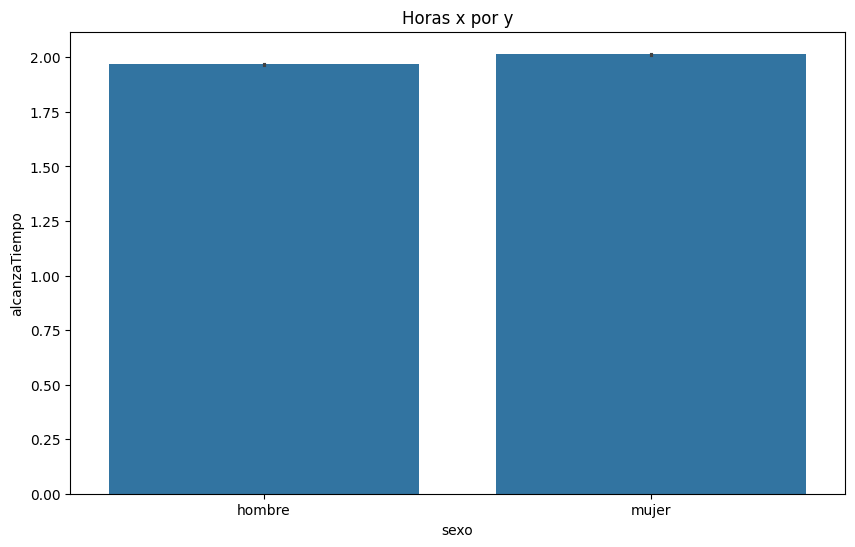

In [246]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

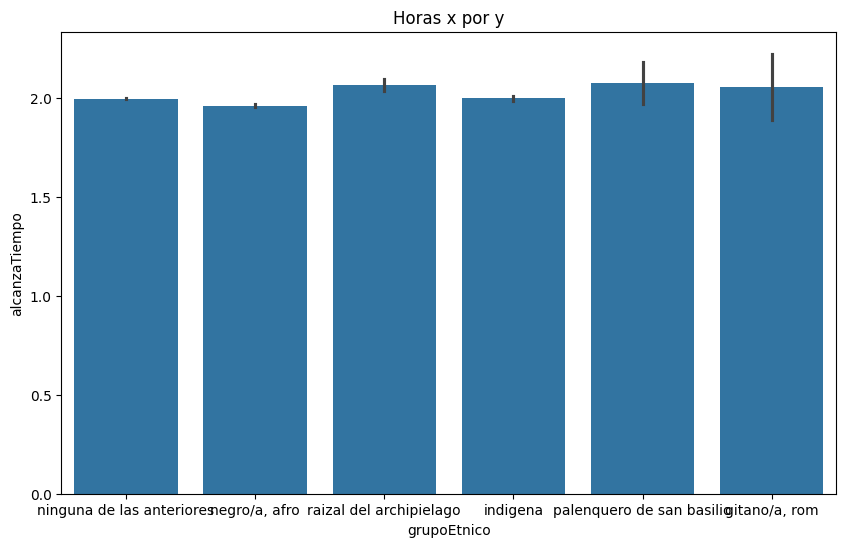

In [247]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['alcanzaTiempo'])
plt.title('Horas x por y')
plt.show()

In [248]:
#adata_c1['region'], data_c1['urbanoORural'], data_c1['estratoTarifa'], data_c1['Internet']], axis=1)
 #data_c3['edad'], data_c3['sexo'], data_c3['grupoEtnico']], axis=1), 

#data_c8_depurada['dormir'], data_c8_depurada['descansar'], data_c8_depurada['deporte'] , data_c8_depurada['caminar'], data_c8_depurada['baresOFiestas'] 
#data_c8_depurada['conversar'], data_c8_depurada['internet'] , data_c8_depurada['internetAlgoMas'] , data_c8_depurada['leer'], data_c8_depurada['instrumento']
#data_c8_depurada['musica'], data_c8_depurada['musicaAlgoMas'] , data_c8_depurada['aconsejar'] , data_c8_depurada['rezarOMeditar'], 
#data_c8_depurada['cuidarPlantas'], data_c8_depurada['cuidarMascotas'], data_c8_depurada['sembrarConsumo'], data_c8_depurada['criarOCazar'],
#data_c8_depurada['jugarNino'], data_c8_depurada['cuentosNino'] , data_c8_depurada['parqueNino'] , data_c8_depurada['alcanzaTiempo'],



(0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
          ... 
 126748    NaN
 126749    1.0
 126750    NaN
 126751    3.0
 126752    NaN
 Name: jugarNino, Length: 126753, dtype: float64,
 0              NaN
 1              NaN
 2              NaN
 3              NaN
 4              NaN
             ...   
 126748         NaN
 126749    0.333333
 126750         NaN
 126751    0.333333
 126752         NaN
 Name: cuentosNino, Length: 126753, dtype: float64,
 0        NaN
 1        NaN
 2        NaN
 3        NaN
 4        NaN
           ..
 126748   NaN
 126749   NaN
 126750   NaN
 126751   NaN
 126752   NaN
 Name: parqueNino, Length: 126753, dtype: float64,
 0         2
 1         1
 2         2
 3         2
 4         2
          ..
 126748    2
 126749    2
 126750    2
 126751    2
 126752    1
 Name: alcanzaTiempo, Length: 126753, dtype: int64)

##Exportación de datos para visualizar


In [255]:


baresOFiestas_por_estrato = data_depurada[~data_depurada['estratoTarifa'].isin([8, 9])]

baresOFiestas_por_estrato = baresOFiestas_por_estrato.groupby('estratoTarifa')['baresOFiestas'].mean().reset_index()
baresOFiestas_por_estrato.to_json('VisualizacionBares/baresOFiestas_por_estrato.json', orient='records')
